# Walmart - Confidence Interval and CLT : Do women spend more on Black Friday than men?

In [1]:
#importing required libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from simple_colors import *
import random
from random import sample
from scipy.stats import norm 
import warnings
warnings.filterwarnings("ignore")

In [2]:
walmart_data = pd.read_csv("walmart_data.csv")

# Exploring data

In [3]:
walmart_data.shape

(550068, 10)

There are 550068 rows and 10 columns in the given dataframe.

In [4]:
walmart_data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# Checking Datatypes

In [5]:
walmart_data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

# Checking for null values

In [6]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
walmart_data.isnull().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No null values found.

# Duplicate Values

In [8]:
walmart_data.duplicated().sum()

0

No duplicate values. Data is clean and neat for analysis.

# Unique Value(counts) for each feature

In [9]:
walmart_data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
for i in walmart_data.columns:
    print(red(i ,'bold')  ,'\n')
    print(walmart_data[i].value_counts(sort=0),'\n')

User_ID 

1001961     55
1004010     12
1000424    694
1002473     22
1004522    112
          ... 
1002518     32
1000471     61
1005077    238
1003030     12
1000983     41
Name: User_ID, Length: 5891, dtype: int64 

Product_ID 

P00027242     22
P00148842    216
P00131842      4
P00173942    398
P00277342      7
            ... 
P00259142    294
P00132242     84
P00202342     49
P00284942     82
P00234742    314
Name: Product_ID, Length: 3631, dtype: int64 

Gender 

F    135809
M    414259
Name: Gender, dtype: int64 

Age 

46-50     45701
18-25     99660
0-17      15102
51-55     38501
26-35    219587
36-45    110013
55+       21504
Name: Age, dtype: int64 

Occupation 

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64 

City_Category 

B    231173
C 

Insights: 
        
            Out of 550068 rows there are 5891 User_Id , which represent each user may have done multiple trasactions or bought multiple products.
    There are 2 Gender, 7 Age, 21 Occupation, 3 City_Category, 5 Stay_In_Current_City, 2 Marital_Status,20 Product_Category categories.

# Exploring columns: Identifying categorical and numerical variables

It is observed that Columns 

'User_ID','Product_ID','Gender', 'Age', 'City_Category','Stay_In_Current_City_Years','Marital_Status' are categorical

'Occupation','Product_Category','Purchase' are numerical columns.

In [11]:
cat_columns = ['User_ID','Product_ID','Gender', 'Age', 'City_Category', 
                       'Stay_In_Current_City_Years','Marital_Status']
for col in cat_columns:
    walmart_data[col] =  walmart_data[col].astype('category')
walmart_data.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

# Statistical Summary

In [12]:
walmart_data.describe().T

count         mean          std   min     25%     50%  \
Occupation        550068.0     8.076707     6.522660   0.0     2.0     7.0   
Product_Category  550068.0     5.404270     3.936211   1.0     1.0     5.0   
Purchase          550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0   

                      75%      max  
Occupation           14.0     20.0  
Product_Category      8.0     20.0  
Purchase          12054.0  23961.0

Insight: 
    As we can observe the mean and standard deviation has much difference for Purchase , 
    Purchase column might be containg outliers.

In [13]:
walmart_data.describe(include='category').T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731

Insight: 

From the above data we can observe that 


        - Customer with User_ID '1001680' has purchased more than others.
        - Product_ID 'P00265242' is the most bought product.
        - Most customers are males.
        - No of Customers in the age group 26-35 are high.
        - Customers from City_Category 'B' have purchased more items.
        - Maximum customers who purchased the items are one year residents.
        - Maximum customers are married.

# Non-Graphical Analysis : Value counts and unique attributes

In [14]:
# UserId vs other Categories

In [15]:
np.round(walmart_data.groupby('Gender')['User_ID'].nunique()/walmart_data['User_ID'].nunique()*100,2)

Gender
F    28.28
M    71.72
Name: User_ID, dtype: float64

In [16]:
np.round(walmart_data.groupby('Marital_Status')['User_ID'].nunique()/walmart_data['User_ID'].nunique()*100,2)

Marital_Status
0    58.0
1    42.0
Name: User_ID, dtype: float64

In [17]:
np.round(walmart_data.groupby('Age')['User_ID'].nunique()/walmart_data['User_ID'].nunique()*100,2)

Age
0-17      3.70
18-25    18.15
26-35    34.85
36-45    19.81
46-50     9.01
51-55     8.16
55+       6.31
Name: User_ID, dtype: float64

In [18]:
np.round(walmart_data.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()/walmart_data['User_ID'].nunique()*100,2)

Stay_In_Current_City_Years
0     13.10
1     35.41
2     19.44
3     16.62
4+    15.43
Name: User_ID, dtype: float64

In [19]:
np.round(walmart_data.groupby('City_Category')['User_ID'].nunique()/walmart_data['User_ID'].nunique()*100,2)

City_Category
A    17.74
B    28.98
C    53.28
Name: User_ID, dtype: float64

Insights: 
    
    71.72 % customers are males and 28.28 customers are females.
    58% Non-married and 42% married customers.
    34.85% customer are from [26-35] age bracket  and leat 3.7% from [0-17] age.
    35.4% are customers who residents in a city for more than 1 year.
    53.28% customers from city cateogory C.

In [20]:
# Purchase vs other Categories

In [21]:
walmart_data.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [22]:
walmart_data.groupby('Marital_Status')['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

In [23]:
walmart_data.groupby('Age')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [24]:
walmart_data.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

count         mean          std   min     25%  \
Stay_In_Current_City_Years                                                     
0                            74398.0  9180.075123  4990.479940  12.0  5480.0   
1                           193821.0  9250.145923  5027.476933  12.0  5500.0   
2                           101838.0  9320.429810  5044.588224  12.0  5846.0   
3                            95285.0  9286.904119  5020.343541  12.0  5832.0   
4+                           84726.0  9275.598872  5017.627594  12.0  5844.0   

                               50%      75%      max  
Stay_In_Current_City_Years                            
0                           8025.0  11990.0  23960.0  
1                           8041.0  12042.0  23961.0  
2                           8072.0  12117.0  23961.0  
3                           8047.0  12075.0  23961.0  
4+                          8052.0  12038.0  23958.0

In [25]:
walmart_data.groupby('City_Category')['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

# Graphical Analysis

# Univariate Analysis

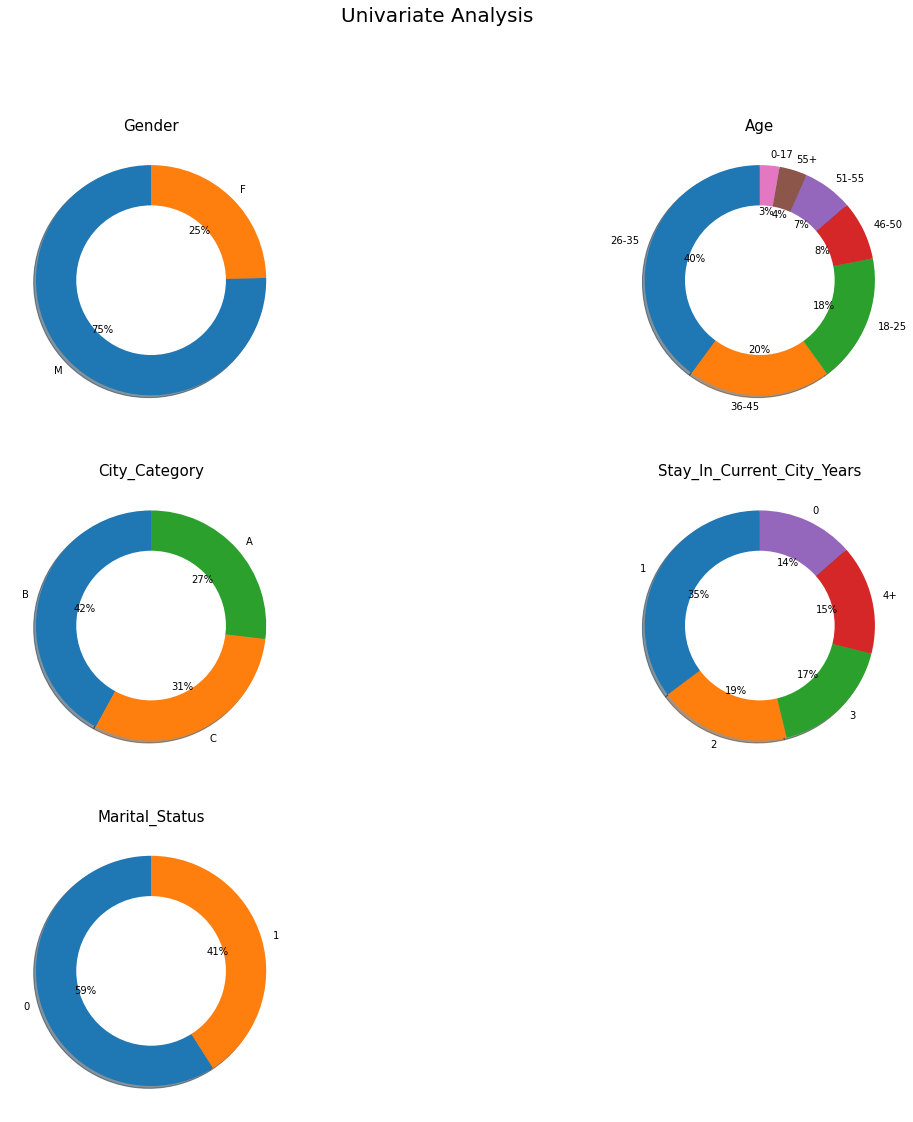

In [26]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status']
fig = plt.figure(figsize=(20,18))
for n,col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)/2 +1, 2, n+1)
    
    plt.pie(walmart_data[col].value_counts().values, labels=walmart_data[col].value_counts().index, 
            shadow= True, autopct='%.0f%%', startangle=90)
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    plt.gcf().gca().add_artist(hole)
    plt.title(col, fontsize = 15)
    plt.xticks(rotation = 45)
    
fig.suptitle("Univariate Analysis", fontsize= 20)
plt.show()

Insights: 
1. Gender Analysis:
    The dataset contains three times more male customers than female customers.

2. Age Group Analysis:
    Adults in the age group of 26-35 years old made the highest number of purchases compared to other age groups.
    Customers in the age group 0-17 years old made fewer purchases.

3. Occupation Analysis:
    Customers with occupation number 4 made the highest number of product purchases.

4. City Category Analysis:
    Customers in City Category B made more purchases than customers in other city categories.

5. Residence Duration Analysis:
    Customers who have stayed in their current city for 1 year made the highest number of transactions 
    compared to other groups.

6. Marital Status Analysis:
    Married customers made more purchases than unmarried customers.

7. Product Category Analysis:
    Product category 5 was the most frequently purchased product category, ranking first in terms of popularity.


# BiVariate Analysis

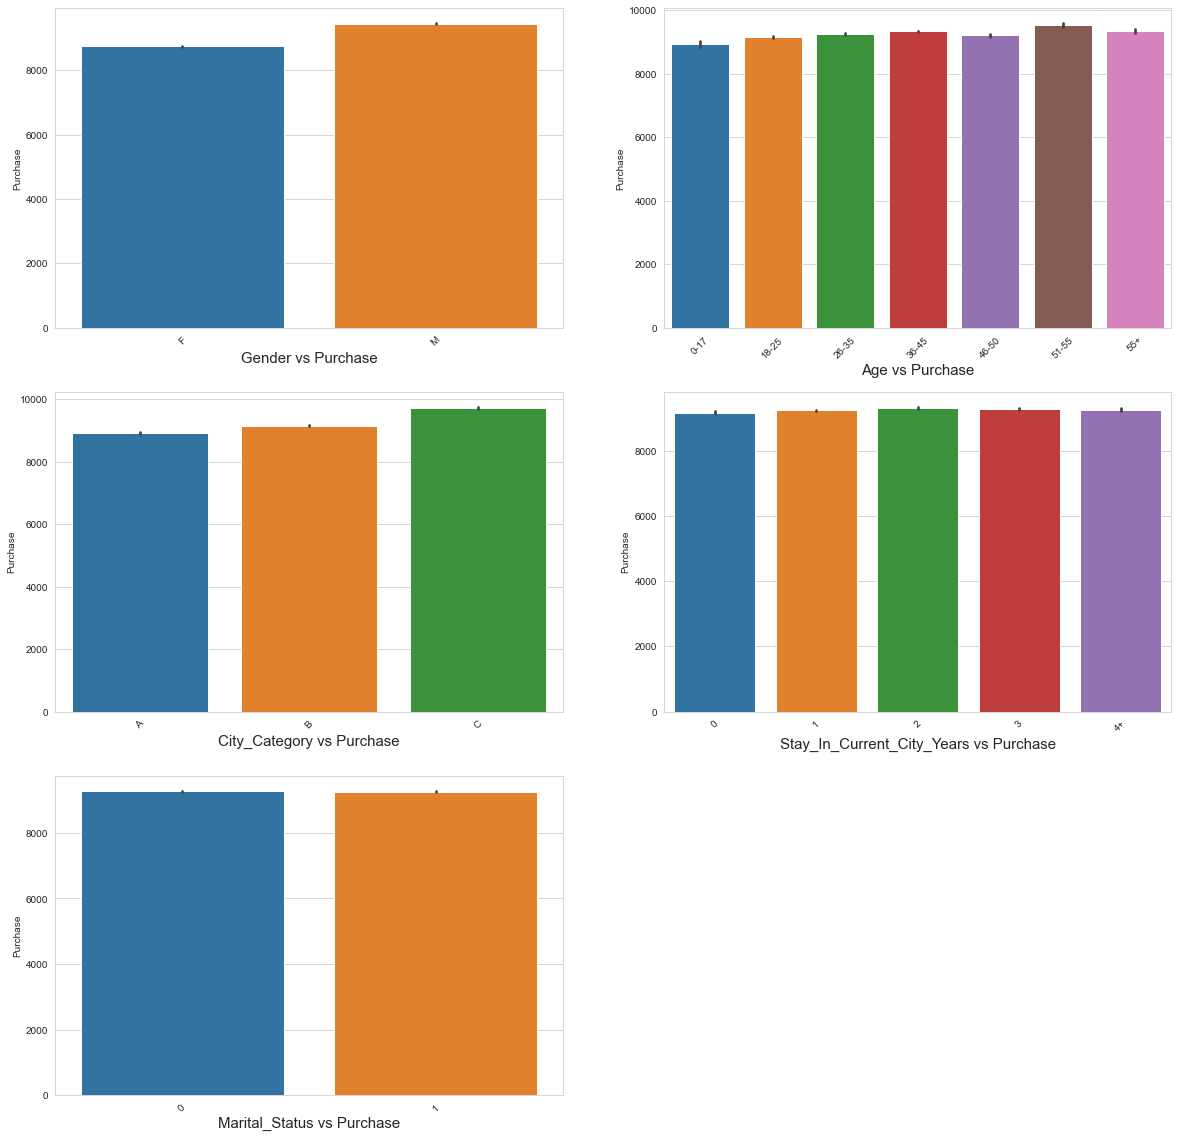

In [69]:
plt.figure(figsize=(20,20))
for n,col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)/2 +1, 2, n+1)
    sns.barplot(x= walmart_data[col] , y= walmart_data['Purchase'])
    sns.set_style("whitegrid")
    plt.xticks(rotation = 45)
    plt.xlabel(f"{col} vs Purchase", fontsize=15)
    
fig.suptitle("Bivariate Analysis", fontsize= 20)
plt.show()

Insights: 
    
    - Male customers contributed for more purchase amount than female customers.
    - Customers in age category [51-55] contributed for more purchase amount.
    - City category 'C' contributed for more purcahse amount.
    - All the Customers from a city irrespective of how long they have been in the city contributed 
      almost equal purchase amount.
    - Married and Unmarried Customers also contributed same purchase amount.

# Multivariate Analysis

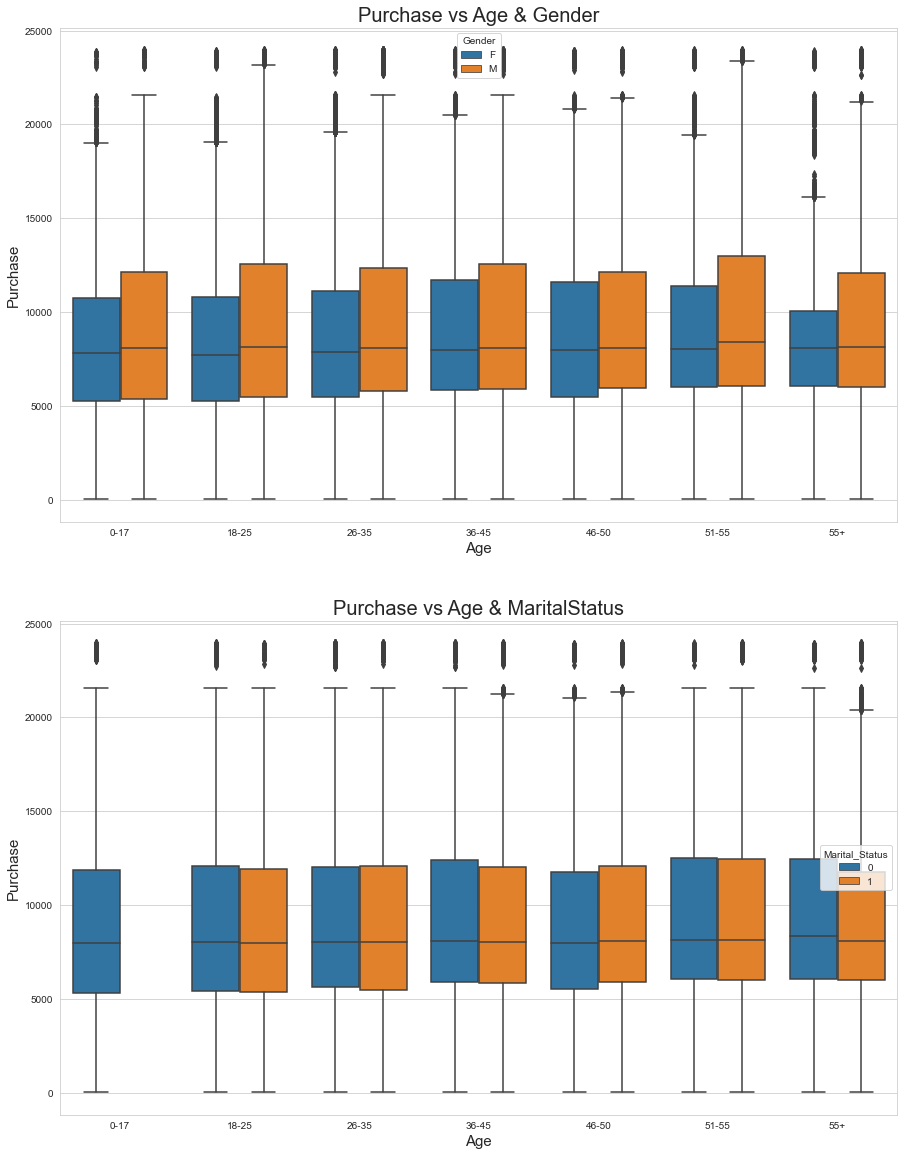

In [28]:
# Purchase, Age and Gender
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
sns.boxplot(x= walmart_data['Age'],y = walmart_data['Purchase'], hue = walmart_data['Gender'])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Purchase", fontsize=15)
plt.title("Purchase vs Age & Gender", fontsize= 20)


plt.subplot(2,1,2)
sns.boxplot(x= walmart_data['Age'],y = walmart_data['Purchase'], hue = walmart_data['Marital_Status'])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Purchase", fontsize=15)
plt.title("Purchase vs Age & MaritalStatus", fontsize= 20)

plt.show()

Insights:
    
    - Purchase amonut is almost equal in all age groups and even in Gender specific and marital status specific.

# Outlier detection

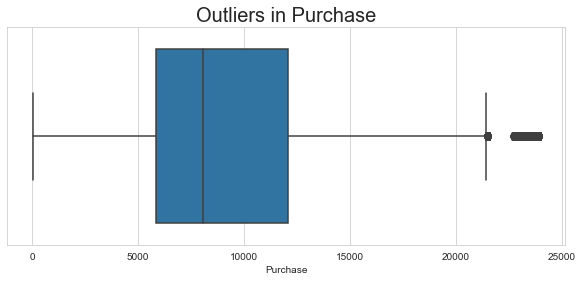

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(x= walmart_data['Purchase'])
plt.title("Outliers in Purchase", fontsize= 20)
plt.show()

Insights: 
    
    Outliers are detected in the Purchase column after 20000 till 25000.

# Correlation between variables

In [30]:
walmart_data.corr()

Occupation  Product_Category  Purchase
Occupation          1.000000         -0.007618  0.020833
Product_Category   -0.007618          1.000000 -0.343703
Purchase            0.020833         -0.343703  1.000000

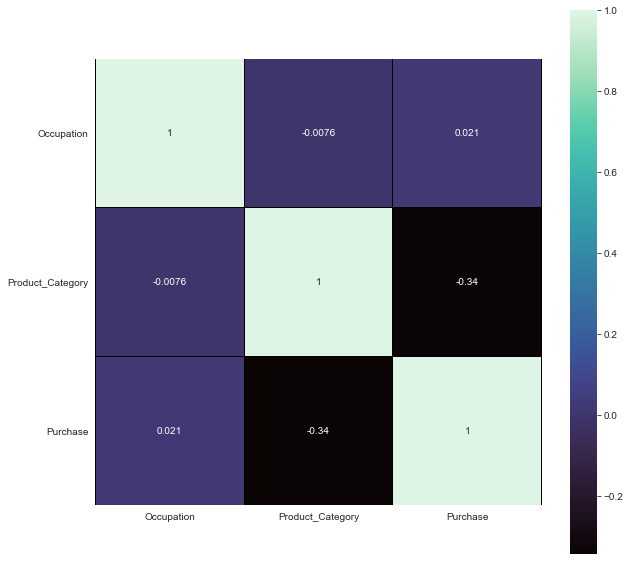

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(walmart_data.corr(), annot = True, cmap = 'mako', linewidths = 0.1, square= True, linecolor = 'Black')
plt.yticks(rotation=0)
plt.show()

Insights: As the dataset is categorical variable centric , we can hardly find correlation in our dataset.

# Are women spending more money per transaction than men? Why or Why not?

In [32]:
walmart_data.groupby('Gender')['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'Spending money per transaction')

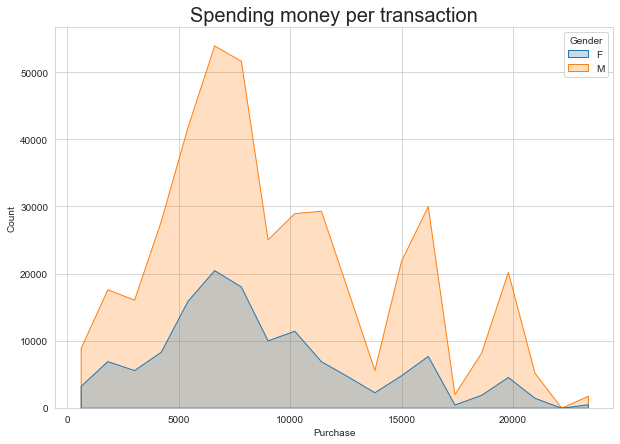

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(data=walmart_data, x = "Purchase", bins=20, hue = "Gender"
             , element="poly")
plt.title('Spending money per transaction', fontsize=20)

Insights:
        From the abouve plot it is observerd that money spent by women customers is quite 
        less than men per transaction.

# Confidence intervals and distribution of the mean of the expenses by female and male customers

In [34]:
walmart_data.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [35]:
walmart_data.shape

(550068, 10)

Out of 550k datapoints in the dataset,

    - Males are 414k 
    - Females are 135k

In [36]:
walmart_data.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Insight:
    An average purchase amount spent by Males(9437.53) is a bit more than Females(8734.57).

In [37]:
walmart_data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                          2              0                 3      8370  
1                          2              0                 1     15200  
2                          2              0                12      1422  
3                          2              0                12      1057  
4                         4+              0                 8      7969

# Analysing Purchase w.r.t Gender with 90,95 and 99% confidence

In [38]:
#Male and Female Purchases
walmart_M_purchase = walmart_data[walmart_data.Gender == 'M']['Purchase']
walmart_F_purchase = walmart_data[walmart_data.Gender == 'F']['Purchase']

In [39]:
# Considerations for sample size, iteration size and confidence levels.
sample_list = [1,30, 100, 500, 1000, 10000,100000] # sample sizes
itrn_size = 1000 # how many times random samples of particular size from sample_list should be taken,
                 #to calculate sample mean and will be stored in a list.
conf_level = [90, 95, 99] # confidence levels 

In [40]:
mu_M = np.round(walmart_M_purchase.mean(),2) #population mean Male purchases
sigma_M = np.round(walmart_M_purchase.std(),2) #population standard deviation Male purchases

In [41]:
mu_F = np.round(walmart_F_purchase.mean(),2) #population mean Female purchases
sigma_F = np.round(walmart_F_purchase.std(),2) #population standard deviation Female purchases

In [42]:
print('Population Mean for male and Female Purchases:\n')
print(f'mu_M: {mu_M}, sigma_M: {sigma_M}')
print()
print(f'mu_F: {mu_F}, sigma_F: {sigma_F}')

Population Mean for male and Female Purchases:

mu_M: 9437.53, sigma_M: 5092.19

mu_F: 8734.57, sigma_F: 4767.23


In [43]:
avg_samples_M = {} # stores all the average values of male purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for male 
for size in sample_list:
    avg_samples_M['sample_M_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_M['sample_M_%s'%size].append(np.random.choice(walmart_M_purchase,size).mean().round(2))
print(avg_samples_M.keys())

avg_samples_F = {} # stores all the average values of female purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for female 
for size in sample_list:
    avg_samples_F['sample_F_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_F['sample_F_%s'%size].append(np.random.choice(walmart_F_purchase,size).mean().round(2))
print(avg_samples_F.keys())

dict_keys(['sample_M_1', 'sample_M_30', 'sample_M_100', 'sample_M_500', 'sample_M_1000', 'sample_M_10000', 'sample_M_100000'])
dict_keys(['sample_F_1', 'sample_F_30', 'sample_F_100', 'sample_F_500', 'sample_F_1000', 'sample_F_10000', 'sample_F_100000'])


In [44]:
# Calculating X_bar, std, Ci for male customers
x_bar_M = {}
std_M = {}
ci_M = {} # for storing CI for diff samples

for keys,values in avg_samples_M.items():
    x_bar_M[keys]={}
    std_M[keys]= {}
    ci_M[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_M[keys] = x_bar
    std_M[keys] = std

    ci={} # dict for storing CI for diff confidence levels
    
    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)
        
        lower_limit = np.round(x_bar - z_score *(std),2)
        upper_limit = np.round(x_bar + z_score *(std),2)

        ci[c].update({'lower_limit': lower_limit, 
                      'upper_limit': upper_limit })

    ci_M[keys].update(ci)
        
print("x_bar_M: ", x_bar_M,'\n')
print("std_M: ", std_M,'\n')
print("ci_M: ", ci_M,'\n')

x_bar_M:  {'sample_M_1': 9759.2, 'sample_M_30': 9434.73, 'sample_M_100': 9451.72, 'sample_M_500': 9444.52, 'sample_M_1000': 9434.62, 'sample_M_10000': 9435.09, 'sample_M_100000': 9437.35} 

std_M:  {'sample_M_1': 5206.0, 'sample_M_30': 941.09, 'sample_M_100': 514.77, 'sample_M_500': 227.66, 'sample_M_1000': 162.95, 'sample_M_10000': 52.2, 'sample_M_100000': 16.08} 

ci_M:  {'sample_M_1': {90: {'lower_limit': 1196.09, 'upper_limit': 18322.31}, 95: {'lower_limit': -444.37, 'upper_limit': 19962.77}, 99: {'lower_limit': -3650.57, 'upper_limit': 23168.97}}, 'sample_M_30': {90: {'lower_limit': 7886.77, 'upper_limit': 10982.69}, 95: {'lower_limit': 7590.23, 'upper_limit': 11279.23}, 99: {'lower_limit': 7010.64, 'upper_limit': 11858.82}}, 'sample_M_100': {90: {'lower_limit': 8605.0, 'upper_limit': 10298.44}, 95: {'lower_limit': 8442.79, 'upper_limit': 10460.65}, 99: {'lower_limit': 8125.76, 'upper_limit': 10777.68}}, 'sample_M_500': {90: {'lower_limit': 9070.05, 'upper_limit': 9818.99}, 95: {'

In [45]:
# Calculating x-bar, std and CI for female customers
x_bar_F = {}
std_F = {}
ci_F ={}

for keys,values in avg_samples_F.items():
    x_bar_F[keys]= {}
    std_F[keys]= {}
    ci_F[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_F[keys] = x_bar
    std_F[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)
        
        lower_limit = np.round(x_bar - z_score * std ,2)
        upper_limit = np.round(x_bar + z_score * std ,2)
        #print(lower_limit,upper_limit)

        ci[c].update({'lower_limit': lower_limit, 
                      'upper_limit': upper_limit })

    ci_F[keys].update(ci)
    
print("x_bar_F: ", x_bar_F,'\n')
print("std_F: ", std_F,'\n')
print("ci_F: ",  ci_F,'\n')

x_bar_F:  {'sample_F_1': 8922.21, 'sample_F_30': 8744.11, 'sample_F_100': 8737.91, 'sample_F_500': 8730.38, 'sample_F_1000': 8737.9, 'sample_F_10000': 8735.09, 'sample_F_100000': 8734.33} 

std_F:  {'sample_F_1': 4916.31, 'sample_F_30': 856.57, 'sample_F_100': 467.91, 'sample_F_500': 207.95, 'sample_F_1000': 146.32, 'sample_F_10000': 47.39, 'sample_F_100000': 14.87} 

ci_F:  {'sample_F_1': {90: {'lower_limit': 835.6, 'upper_limit': 17008.82}, 95: {'lower_limit': -713.58, 'upper_limit': 18558.0}, 99: {'lower_limit': -3741.37, 'upper_limit': 21585.79}}, 'sample_F_30': {90: {'lower_limit': 7335.18, 'upper_limit': 10153.04}, 95: {'lower_limit': 7065.26, 'upper_limit': 10422.96}, 99: {'lower_limit': 6537.73, 'upper_limit': 10950.49}}, 'sample_F_100': {90: {'lower_limit': 7968.27, 'upper_limit': 9507.55}, 95: {'lower_limit': 7820.82, 'upper_limit': 9655.0}, 99: {'lower_limit': 7532.65, 'upper_limit': 9943.17}}, 'sample_F_500': {90: {'lower_limit': 8388.33, 'upper_limit': 9072.43}, 95: {'lowe

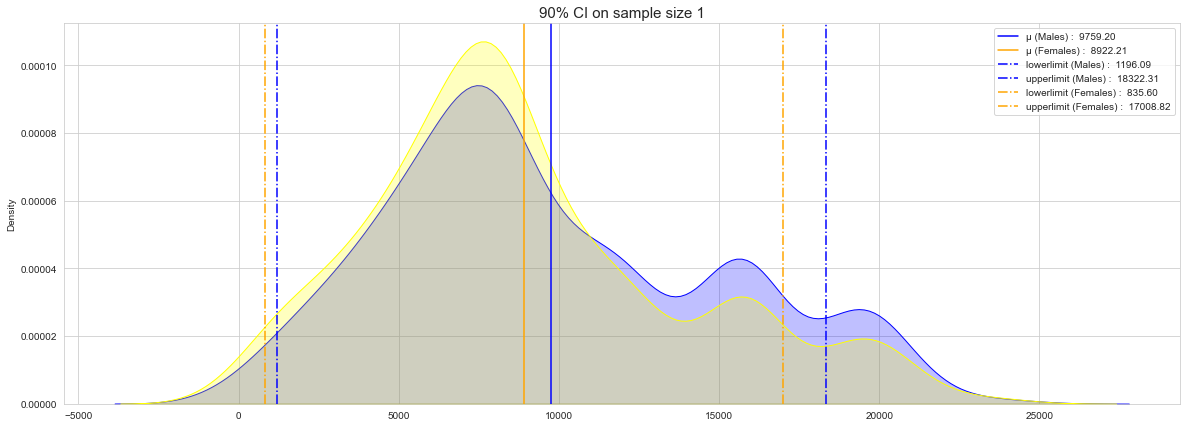

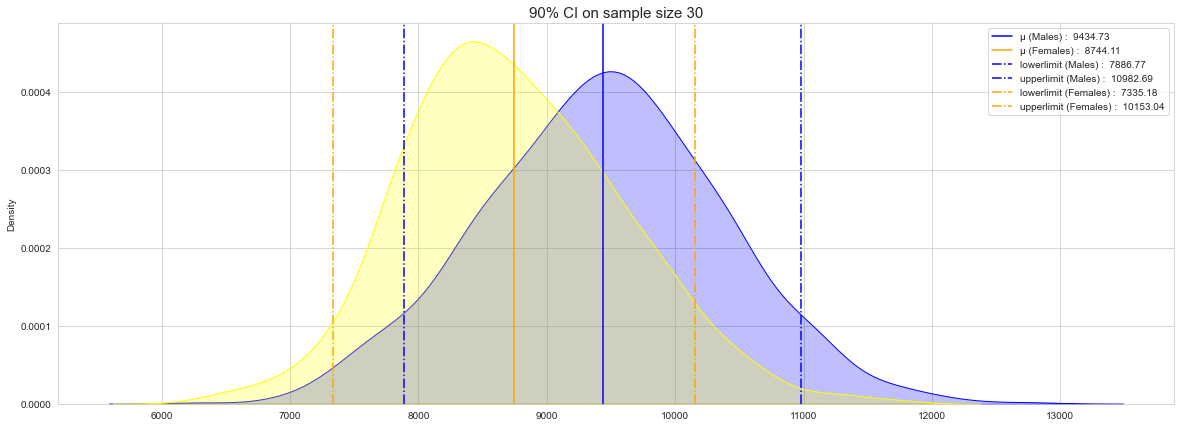

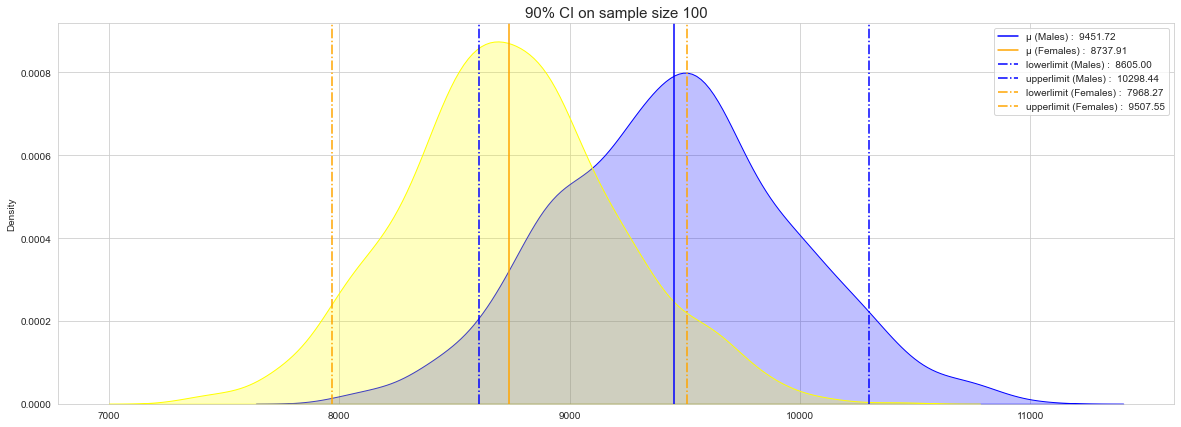

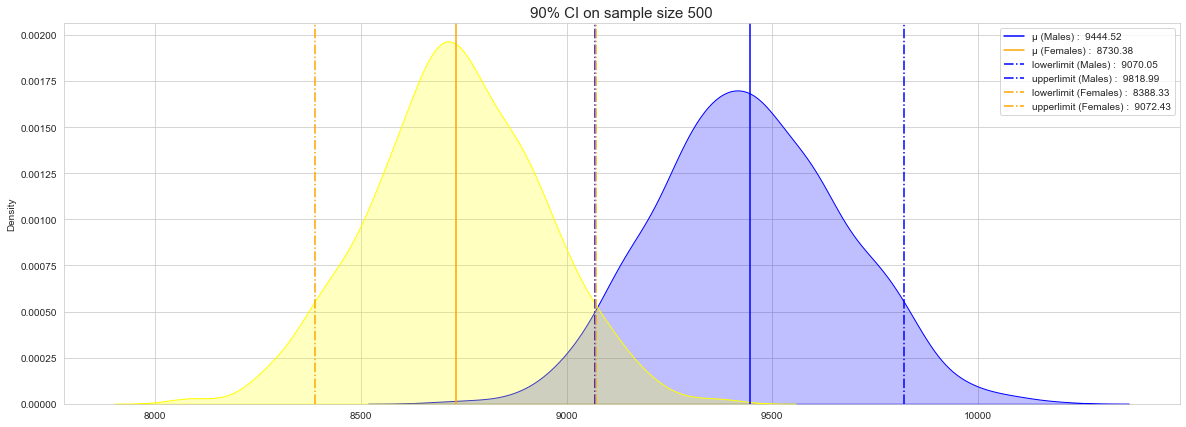

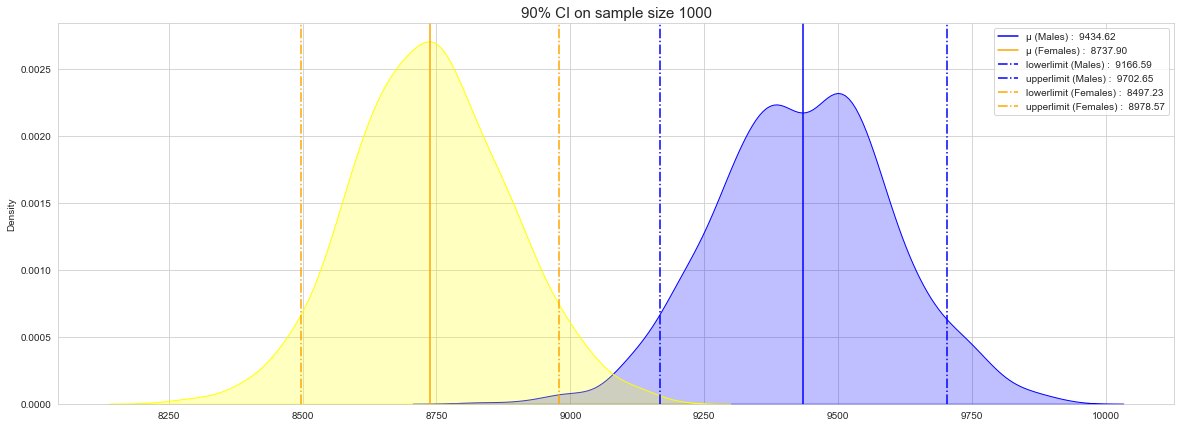

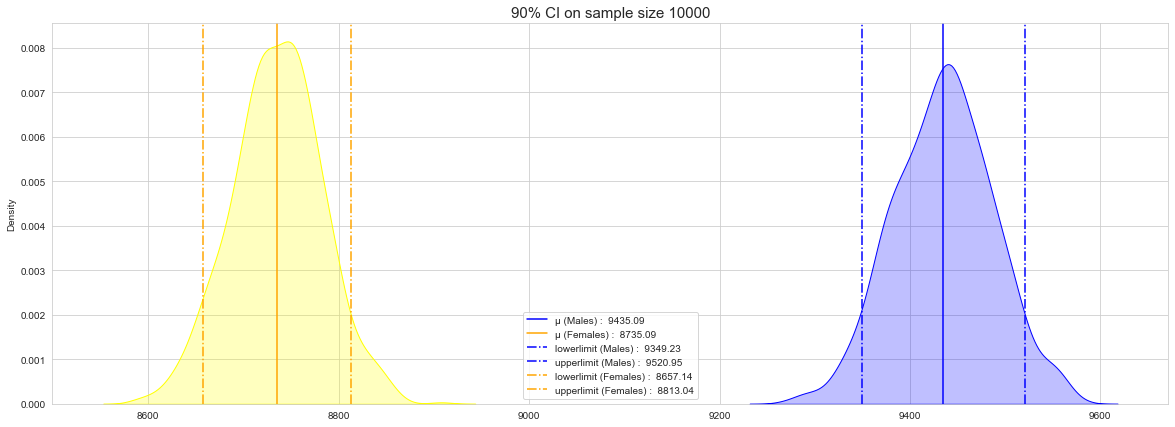

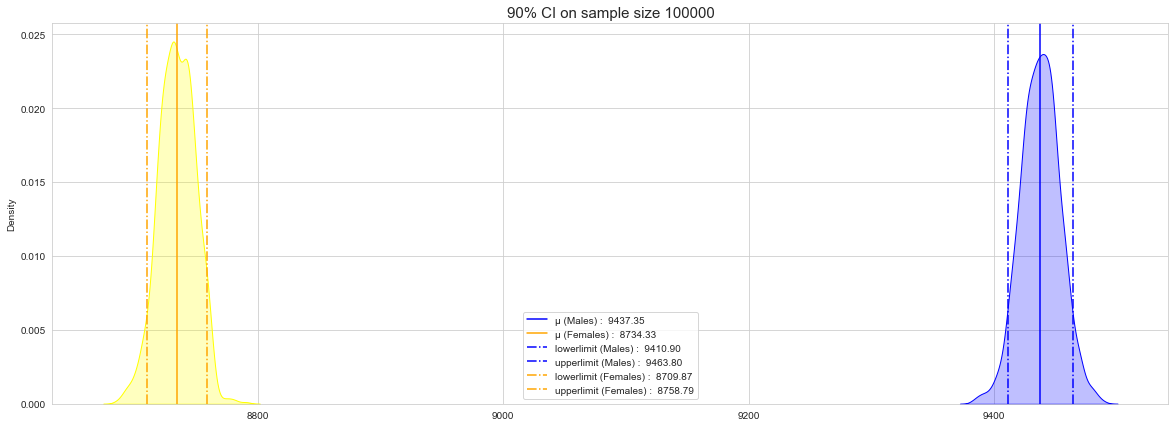

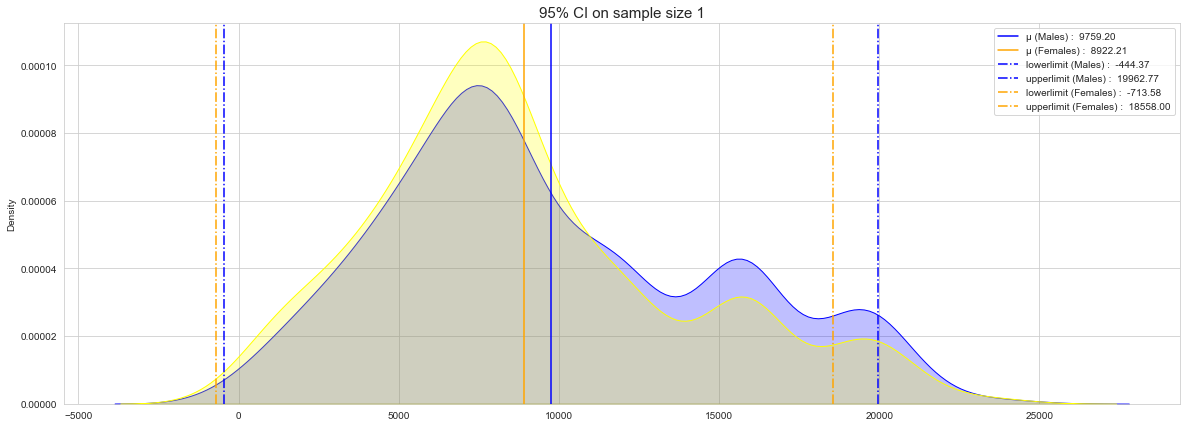

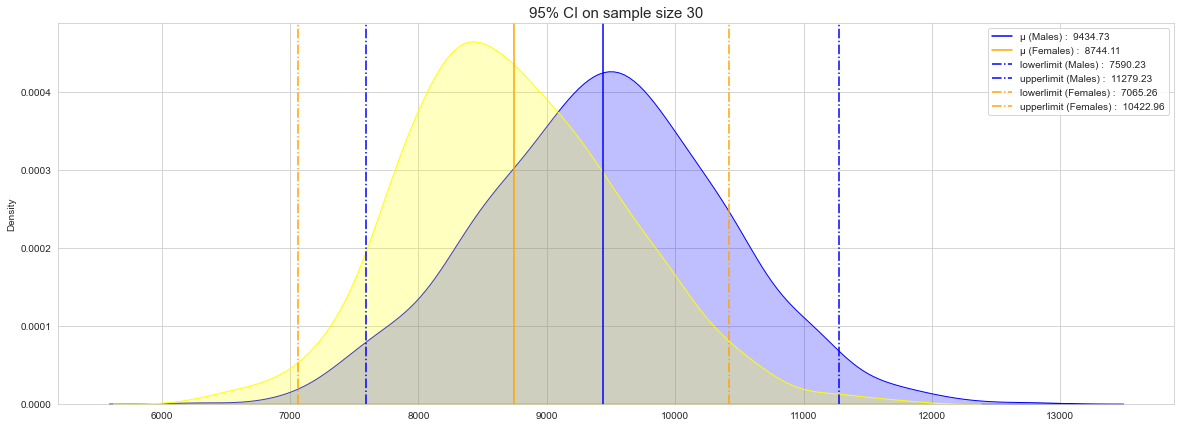

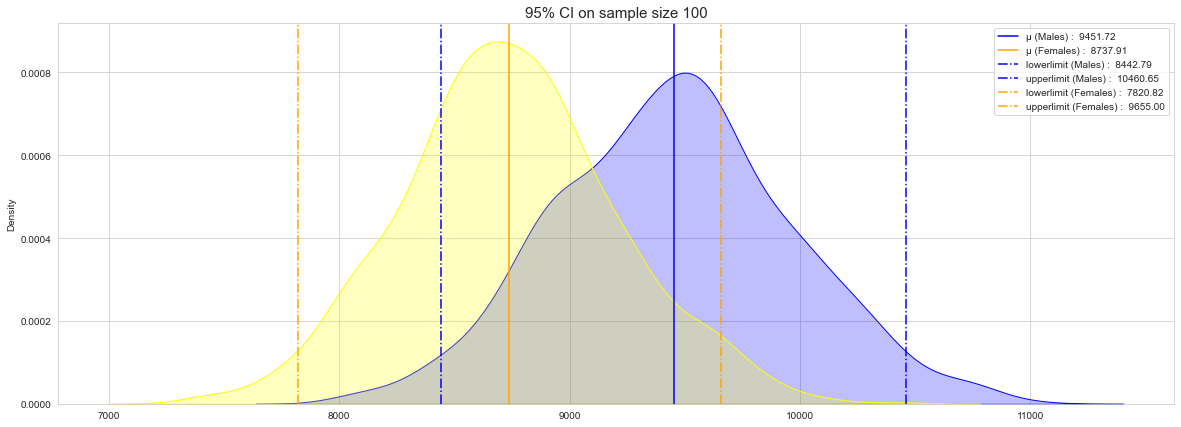

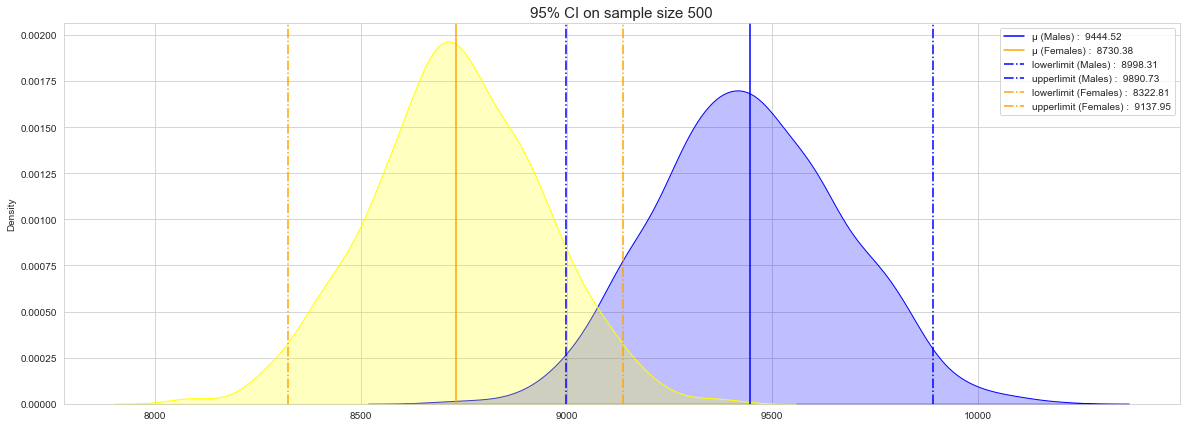

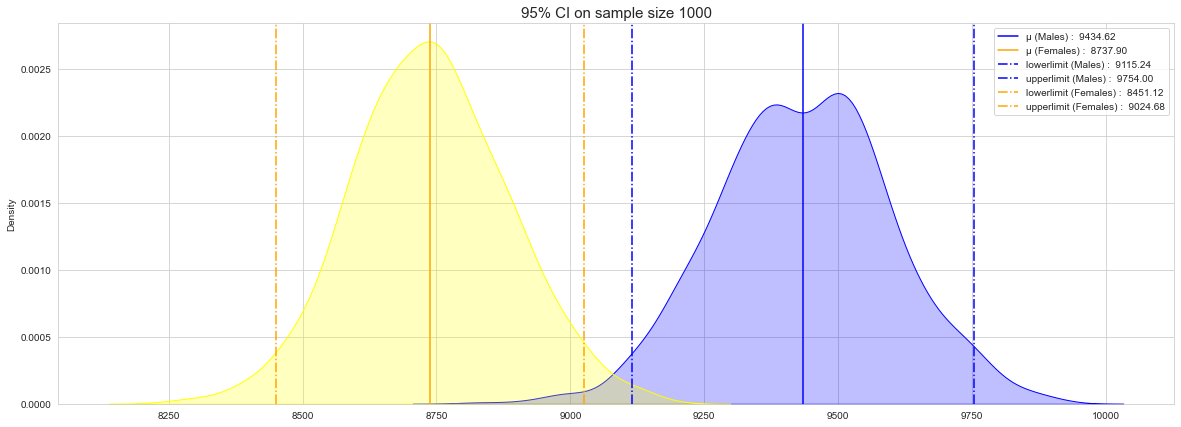

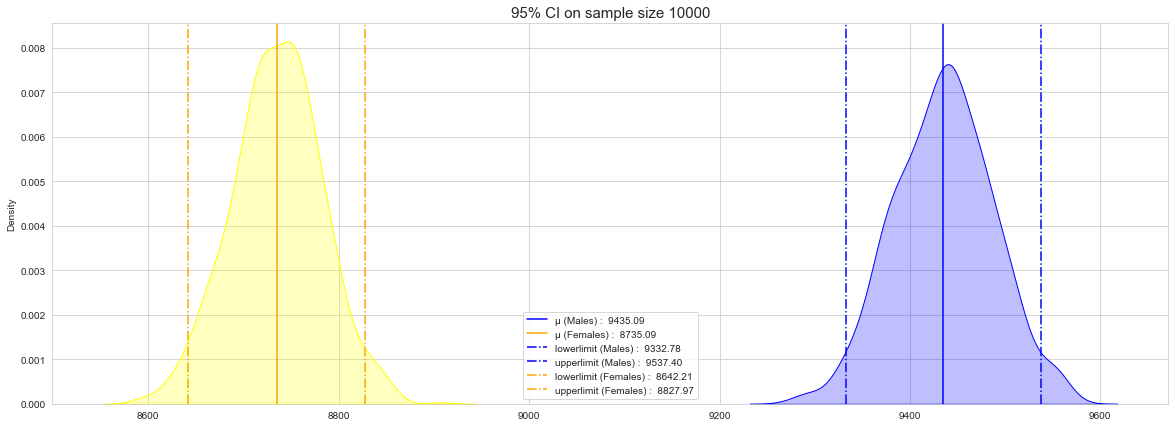

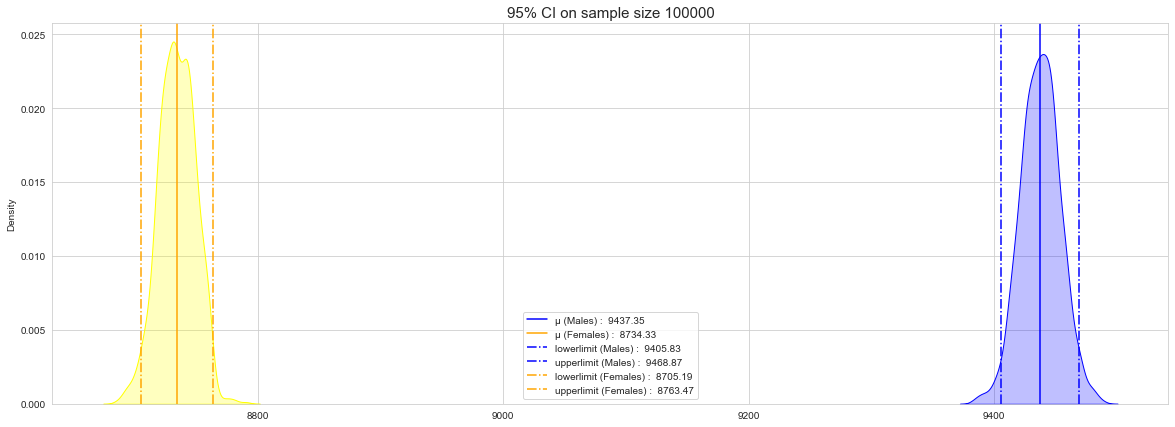

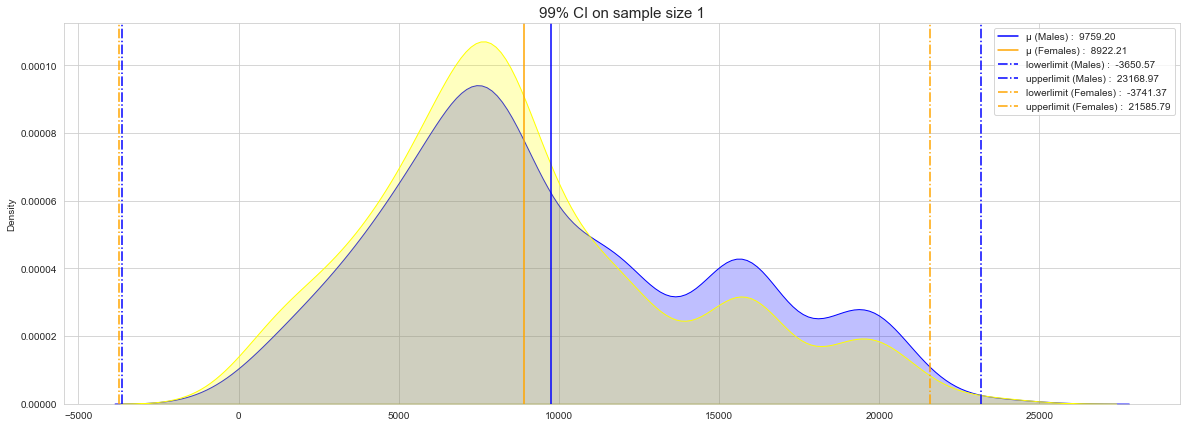

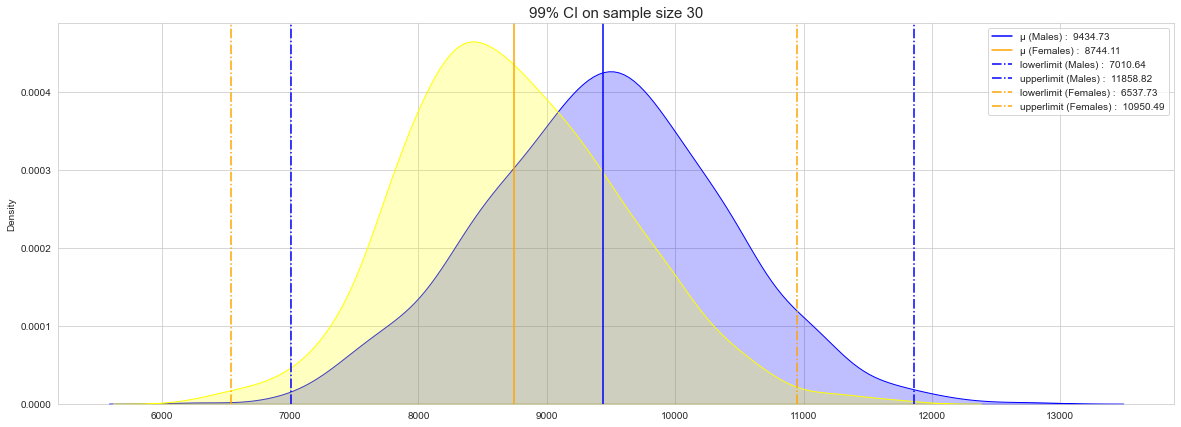

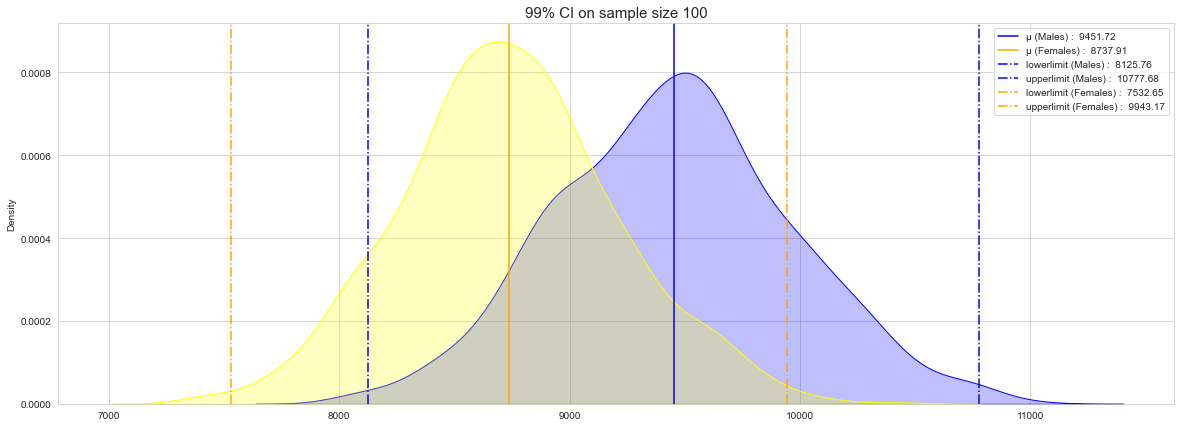

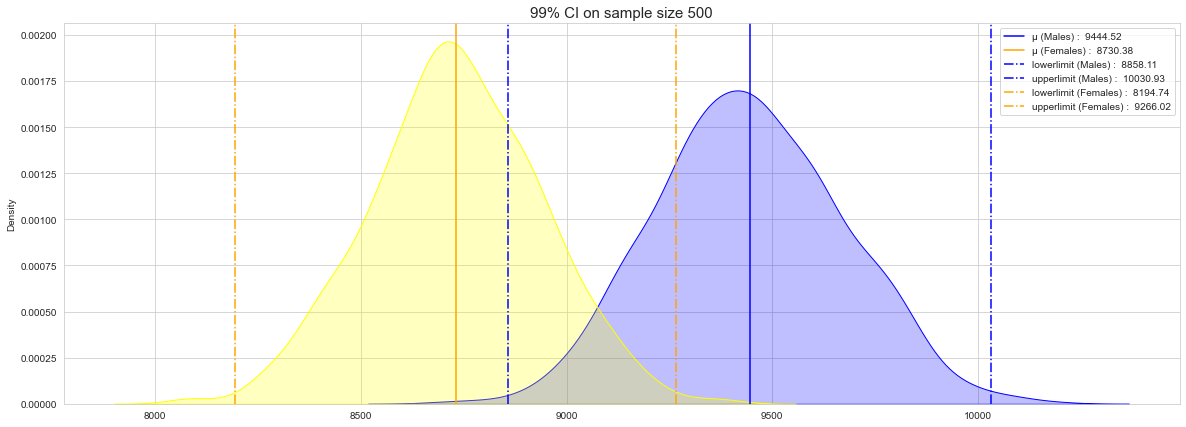

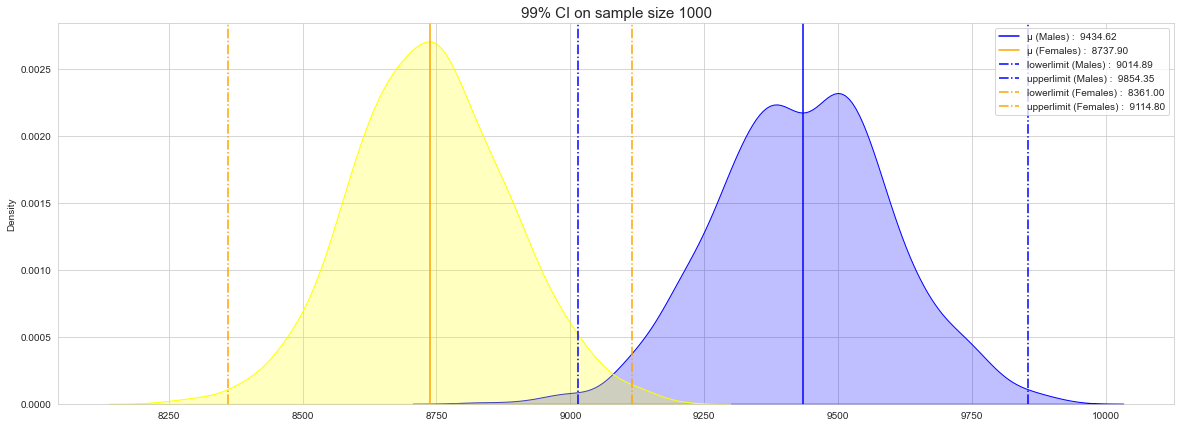

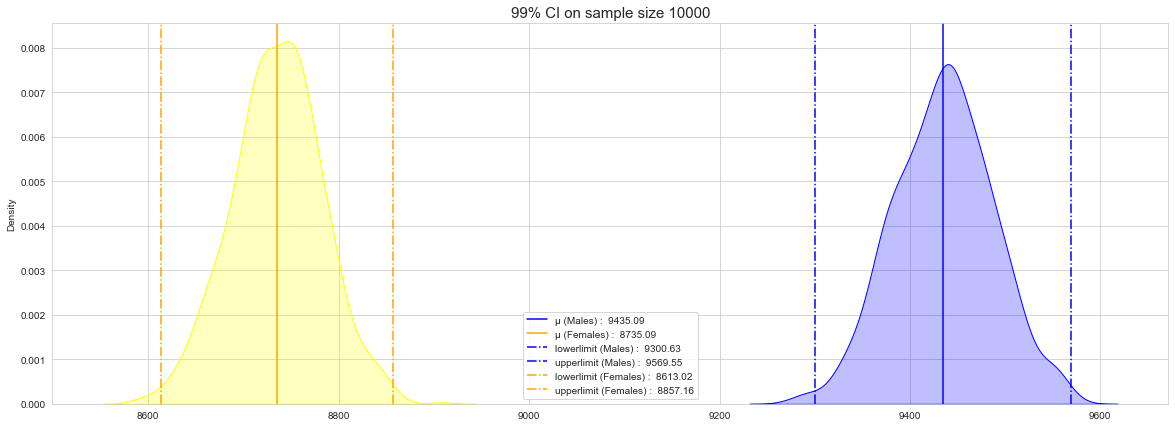

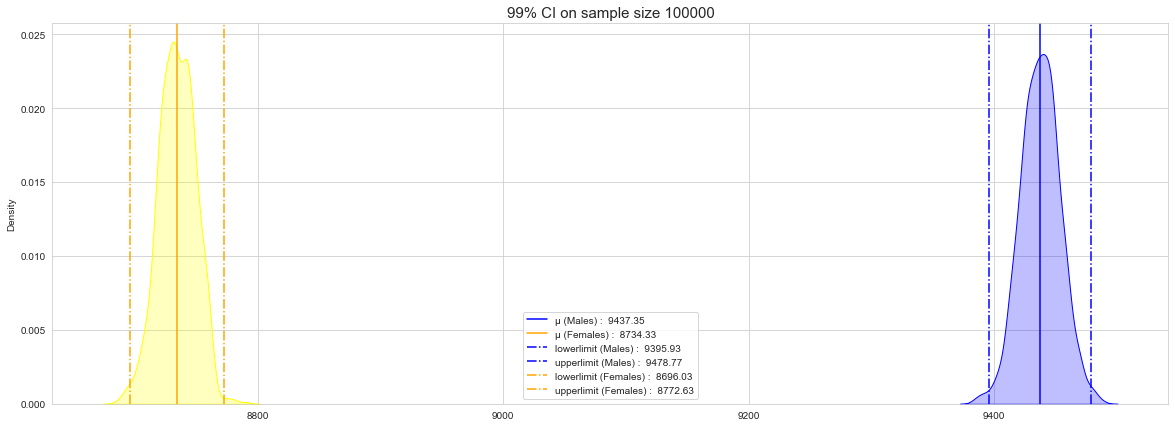

In [46]:
#daframe storing all CI's for male and female with 90,95 and 99 confidence levels for diff sample sizes
overlap = pd.DataFrame({}, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

for c in conf_level:
    
    for size in sample_list:

        ll_m = ci_M['sample_M_%s'%size][c]['lower_limit']
        ul_m = ci_M['sample_M_%s'%size][c]['upper_limit']
        
        ll_f = ci_F['sample_F_%s'%size][c]['lower_limit']
        ul_f = ci_F['sample_F_%s'%size][c]['upper_limit']
        
        plt.figure(figsize=(20,7))

        sns.kdeplot(x= avg_samples_M['sample_M_%s'%size], fill= True, common_grid=False, color= 'blue')
        sns.kdeplot(x= avg_samples_F['sample_F_%s'%size], fill= True, common_grid=False, color= 'yellow')

        plt.axvline(x_bar_M['sample_M_%s'%size], color = 'blue', 
                    label= "μ (Males) :  {:.2f}".format(x_bar_M['sample_M_%s'%size]))
        plt.axvline(x_bar_F['sample_F_%s'%size], color = 'orange', 
                    label= "μ (Females) :  {:.2f}".format(x_bar_F['sample_F_%s'%size]))

        plt.axvline(ll_m, color = 'blue',linestyle='dashdot',
                    label= "lowerlimit (Males) :  {:.2f}".format(ll_m))
        plt.axvline(ul_m, color = 'blue',linestyle='dashdot',
                    label= "upperlimit (Males) :  {:.2f}".format(ul_m))
        
        plt.axvline(ll_f, color = 'orange',linestyle='dashdot',
                    label= "lowerlimit (Females) :  {:.2f}".format(ll_f))
        plt.axvline(ul_f, color = 'orange',linestyle='dashdot',
                    label= "upperlimit (Females) :  {:.2f}".format(ul_f))
        
        plt.legend()
        plt.title(f'{c}% CI on sample size {size}', fontsize = 15)
        
        dict_M = pd.DataFrame([{'Gender': 'M','Lower_limit': ll_m,'Upper_limit': ul_m,
                               'Sample_Size': size,'Range': (ul_m-ll_m),'Confidence_pct': c}])
        dict_F = pd.DataFrame([{'Gender': 'F','Lower_limit': ll_f,'Upper_limit': ul_f,
                               'Sample_Size': size,'Range': (ul_f-ll_f),'Confidence_pct': c}]) # 'CI': [ll_m,ul_m],
        dict3 = pd.concat([dict_M,dict_F])
        overlap = pd.concat([overlap, dict3])
   

Insights: 
    
    - As the sample size increases the male and female distrubutions became apart and with increasing sample 
    size the standard deviation is also decresing whith can be known from the spreadof the curve.
    - As sample size increases the spread of the curve decreases. No overlapping between male and female curves 
    is found for 10k and 100k samples.
    - It is also observed that the CI of females are always less than males with all 90,95 and 99% confidence, stating that the purchase of female customers is less than male customers.

In [47]:
# Male and Female confidence intervals for confidence level 90
overlap[overlap.Confidence_pct==90].reset_index(drop=True)

Gender  Lower_limit  Upper_limit Sample_Size     Range Confidence_pct
0       M      1196.09     18322.31           1  17126.22             90
1       F       835.60     17008.82           1  16173.22             90
2       M      7886.77     10982.69          30   3095.92             90
3       F      7335.18     10153.04          30   2817.86             90
4       M      8605.00     10298.44         100   1693.44             90
5       F      7968.27      9507.55         100   1539.28             90
6       M      9070.05      9818.99         500    748.94             90
7       F      8388.33      9072.43         500    684.10             90
8       M      9166.59      9702.65        1000    536.06             90
9       F      8497.23      8978.57        1000    481.34             90
10      M      9349.23      9520.95       10000    171.72             90
11      F      8657.14      8813.04       10000    155.90             90
12      M      9410.90      9463.80      100000     52.90             90
13      F      8709.87      8758.79      100000     48.92             90

In [48]:
# Male and Female confidence intervals for confidence level 95
overlap[overlap.Confidence_pct==95].reset_index(drop=True)

Gender  Lower_limit  Upper_limit Sample_Size     Range Confidence_pct
0       M      -444.37     19962.77           1  20407.14             95
1       F      -713.58     18558.00           1  19271.58             95
2       M      7590.23     11279.23          30   3689.00             95
3       F      7065.26     10422.96          30   3357.70             95
4       M      8442.79     10460.65         100   2017.86             95
5       F      7820.82      9655.00         100   1834.18             95
6       M      8998.31      9890.73         500    892.42             95
7       F      8322.81      9137.95         500    815.14             95
8       M      9115.24      9754.00        1000    638.76             95
9       F      8451.12      9024.68        1000    573.56             95
10      M      9332.78      9537.40       10000    204.62             95
11      F      8642.21      8827.97       10000    185.76             95
12      M      9405.83      9468.87      100000     63.04             95
13      F      8705.19      8763.47      100000     58.28             95

In [49]:
# Male and Female confidence intervals for confidence level 99
overlap[overlap.Confidence_pct==99].reset_index(drop=True)

Gender  Lower_limit  Upper_limit Sample_Size     Range Confidence_pct
0       M     -3650.57     23168.97           1  26819.54             99
1       F     -3741.37     21585.79           1  25327.16             99
2       M      7010.64     11858.82          30   4848.18             99
3       F      6537.73     10950.49          30   4412.76             99
4       M      8125.76     10777.68         100   2651.92             99
5       F      7532.65      9943.17         100   2410.52             99
6       M      8858.11     10030.93         500   1172.82             99
7       F      8194.74      9266.02         500   1071.28             99
8       M      9014.89      9854.35        1000    839.46             99
9       F      8361.00      9114.80        1000    753.80             99
10      M      9300.63      9569.55       10000    268.92             99
11      F      8613.02      8857.16       10000    244.14             99
12      M      9395.93      9478.77      100000     82.84             99
13      F      8696.03      8772.63      100000     76.60             99

Insights: 
    
    - Overlapping of confidence intervals for mean purchase of male and female customers is increasing, 
        which can be known from CI's of 90,95 and 99 confidence levels :
        
        Females:
    - 90% confidence: [8710.65, 8759.33] and diff in CI : 48.68	
    - 95% confidence: [8705.98, 8764.00] and diff in CI : 58.02
    - 99% confidence: [8696.87, 8773.11] and diff in CI : 76.24
    
     Males:
    - 90% confidence: [9410.70, 9463.08] and diff in CI : 52.38	
    - 95% confidence: [9405.69, 9468.09] and diff in CI : 62.40	
    - 99% confidence: [9395.88, 9477.90] and diff in CI : 82.02
            
    As we can see the CI's the female purchase is always less than male purchase on average.

# Analysing Purchase w.r.t Marital Status with 90,95 and 99% confidence

In [50]:
# Analysing Purchase w.r.t Marital Status with 90,95 and 99% confidence

#Married and Unmarried customer Purchases
walmart_Mr_purchase = walmart_data[walmart_data.Marital_Status == 1]['Purchase']
walmart_UnMr_purchase = walmart_data[walmart_data.Marital_Status == 0]['Purchase']

In [51]:
mu_Mr = np.round(walmart_Mr_purchase.mean(),2) #population mean Married purchases
sigma_Mr = np.round(walmart_Mr_purchase.std(),2) #population standard deviation Married purchases

mu_UnMr = np.round(walmart_UnMr_purchase.mean(),2) #population mean Unmarried purchases
sigma_UnMr = np.round(walmart_UnMr_purchase.std(),2) #population standard deviation Unmarried purchases

print('Population Mean for married and unmarried customer Purchases:\n')
print(f'mu_Mr: {mu_Mr}, sigma_Mr: {sigma_Mr}')
print()
print(f'mu_UnMr: {mu_UnMr}, sigma_UnMr: {sigma_UnMr}')

Population Mean for married and unmarried customer Purchases:

mu_Mr: 9261.17, sigma_Mr: 5016.9

mu_UnMr: 9265.91, sigma_UnMr: 5027.35


In [52]:
avg_samples_Mr = {} # stores all the average values of married customer purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for married customers 
for size in sample_list:
    avg_samples_Mr['sample_Mr_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_Mr['sample_Mr_%s'%size].append(np.random.choice(walmart_Mr_purchase,size).mean().round(2))
print(avg_samples_Mr.keys())

avg_samples_UnMr = {} # stores all the average values of unmarried purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for unmarried customers 
for size in sample_list:
    avg_samples_UnMr['sample_UnMr_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_UnMr['sample_UnMr_%s'%size].append(np.random.choice(walmart_UnMr_purchase,size).mean().round(2))
print(avg_samples_UnMr.keys())

dict_keys(['sample_Mr_1', 'sample_Mr_30', 'sample_Mr_100', 'sample_Mr_500', 'sample_Mr_1000', 'sample_Mr_10000', 'sample_Mr_100000'])
dict_keys(['sample_UnMr_1', 'sample_UnMr_30', 'sample_UnMr_100', 'sample_UnMr_500', 'sample_UnMr_1000', 'sample_UnMr_10000', 'sample_UnMr_100000'])


In [53]:
#storing sample mean, std and ci of married customers
x_bar_Mr = {}
std_Mr = {}
ci_Mr = {} # for storing CI for diff samples

for keys,values in avg_samples_Mr.items():
    x_bar_Mr[keys]={}
    std_Mr[keys]= {}
    ci_Mr[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_Mr[keys] = x_bar
    std_Mr[keys] = std

    ci={} # dict for storing CI for diff confidence levels
    
    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)
        
        lower_limit = np.round(x_bar - z_score *(std),2)
        upper_limit = np.round(x_bar + z_score *(std),2)

        ci[c].update({'lower_limit': lower_limit, 
                      'upper_limit': upper_limit })

    ci_Mr[keys].update(ci)
        
print("x_bar_Mr: ", x_bar_Mr,'\n')
print("std_Mr: ", std_Mr,'\n')
print("ci_Mr: ", ci_Mr,'\n')

x_bar_Mr:  {'sample_Mr_1': 9130.17, 'sample_Mr_30': 9260.42, 'sample_Mr_100': 9292.67, 'sample_Mr_500': 9260.84, 'sample_Mr_1000': 9264.49, 'sample_Mr_10000': 9261.34, 'sample_Mr_100000': 9260.82} 

std_Mr:  {'sample_Mr_1': 4730.74, 'sample_Mr_30': 918.19, 'sample_Mr_100': 494.67, 'sample_Mr_500': 224.84, 'sample_Mr_1000': 157.89, 'sample_Mr_10000': 49.2, 'sample_Mr_100000': 15.31} 

ci_Mr:  {'sample_Mr_1': {90: {'lower_limit': 1348.8, 'upper_limit': 16911.54}, 95: {'lower_limit': -141.91, 'upper_limit': 18402.25}, 99: {'lower_limit': -3055.41, 'upper_limit': 21315.75}}, 'sample_Mr_30': {90: {'lower_limit': 7750.13, 'upper_limit': 10770.71}, 95: {'lower_limit': 7460.8, 'upper_limit': 11060.04}, 99: {'lower_limit': 6895.32, 'upper_limit': 11625.52}}, 'sample_Mr_100': {90: {'lower_limit': 8479.01, 'upper_limit': 10106.33}, 95: {'lower_limit': 8323.13, 'upper_limit': 10262.21}, 99: {'lower_limit': 8018.48, 'upper_limit': 10566.86}}, 'sample_Mr_500': {90: {'lower_limit': 8891.01, 'upper_li

In [54]:
#storing sample mean, std and ci of unmarried customers
x_bar_UnMr = {}
std_UnMr = {}
ci_UnMr ={}

for keys,values in avg_samples_UnMr.items():
    x_bar_UnMr[keys]= {}
    std_UnMr[keys]= {}
    ci_UnMr[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_UnMr[keys] = x_bar
    std_UnMr[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)
        
        lower_limit = np.round(x_bar - z_score * std ,2)
        upper_limit = np.round(x_bar + z_score * std ,2)
        #print(lower_limit,upper_limit)

        ci[c].update({'lower_limit': lower_limit, 
                      'upper_limit': upper_limit })

    ci_UnMr[keys].update(ci)
    
print("x_bar_UnMr: ", x_bar_UnMr,'\n')
print("std_UnMr: ", std_UnMr,'\n')
print("ci_UnMr: ",  ci_UnMr,'\n')

x_bar_UnMr:  {'sample_UnMr_1': 9442.52, 'sample_UnMr_30': 9303.45, 'sample_UnMr_100': 9286.33, 'sample_UnMr_500': 9257.45, 'sample_UnMr_1000': 9281.09, 'sample_UnMr_10000': 9266.27, 'sample_UnMr_100000': 9266.23} 

std_UnMr:  {'sample_UnMr_1': 4970.44, 'sample_UnMr_30': 913.55, 'sample_UnMr_100': 507.73, 'sample_UnMr_500': 227.2, 'sample_UnMr_1000': 160.53, 'sample_UnMr_10000': 50.73, 'sample_UnMr_100000': 16.44} 

ci_UnMr:  {'sample_UnMr_1': {90: {'lower_limit': 1266.87, 'upper_limit': 17618.17}, 95: {'lower_limit': -299.36, 'upper_limit': 19184.4}, 99: {'lower_limit': -3360.49, 'upper_limit': 22245.53}}, 'sample_UnMr_30': {90: {'lower_limit': 7800.79, 'upper_limit': 10806.11}, 95: {'lower_limit': 7512.92, 'upper_limit': 11093.98}, 99: {'lower_limit': 6950.3, 'upper_limit': 11656.6}}, 'sample_UnMr_100': {90: {'lower_limit': 8451.19, 'upper_limit': 10121.47}, 95: {'lower_limit': 8291.2, 'upper_limit': 10281.46}, 99: {'lower_limit': 7978.5, 'upper_limit': 10594.16}}, 'sample_UnMr_500': 

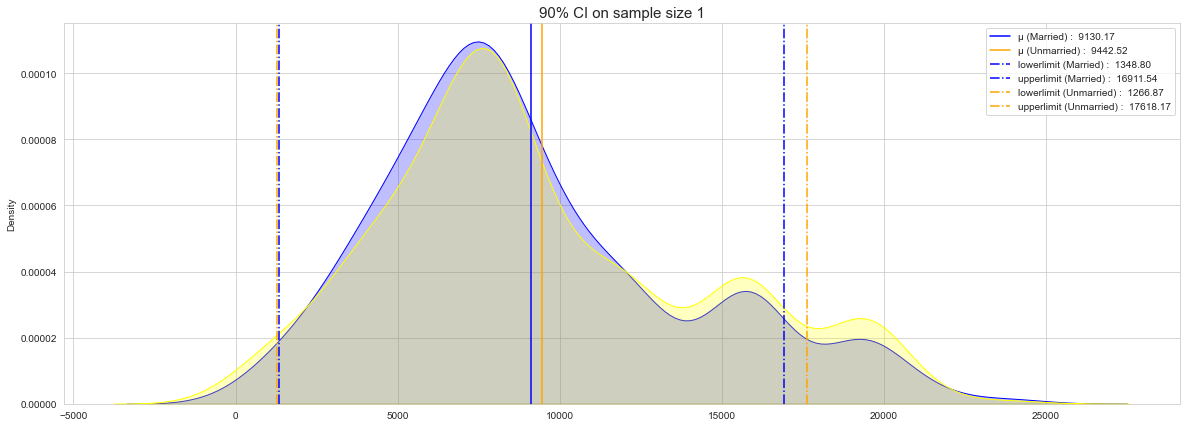

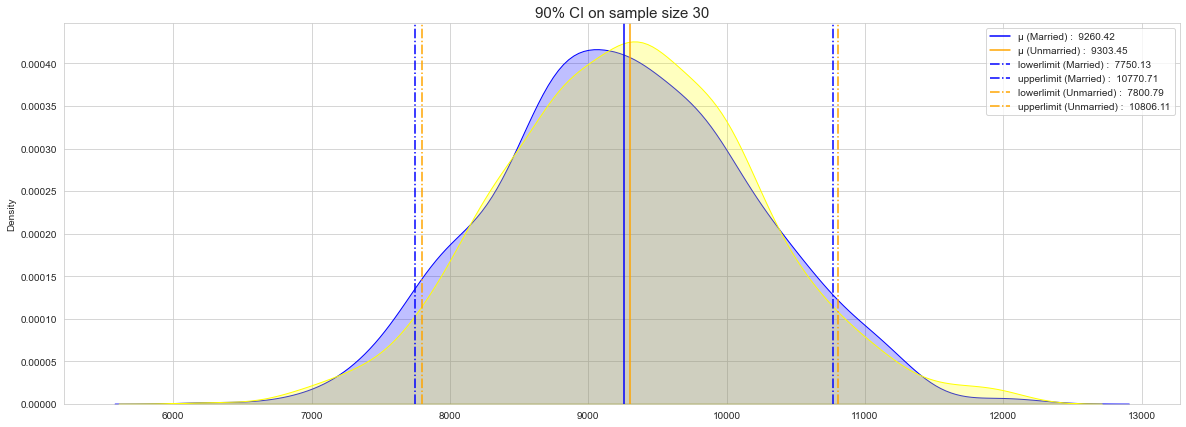

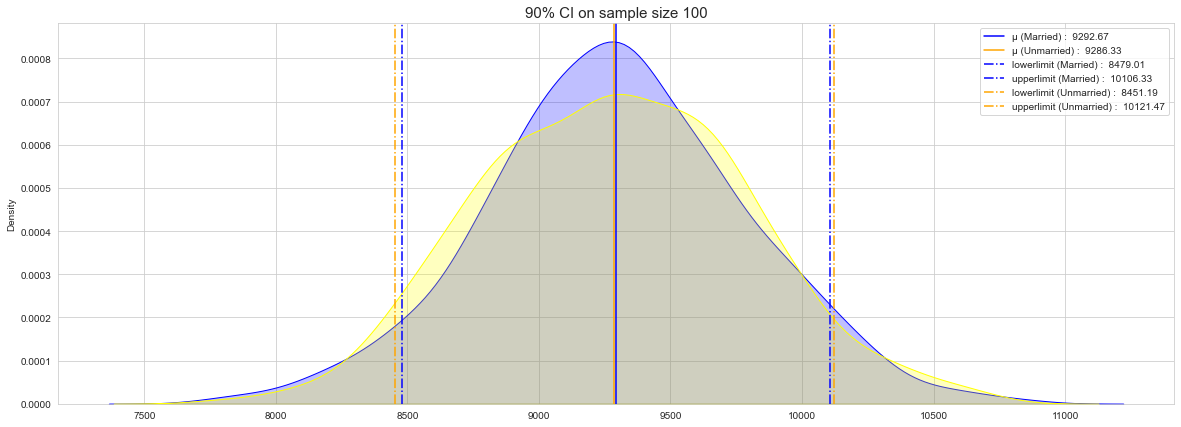

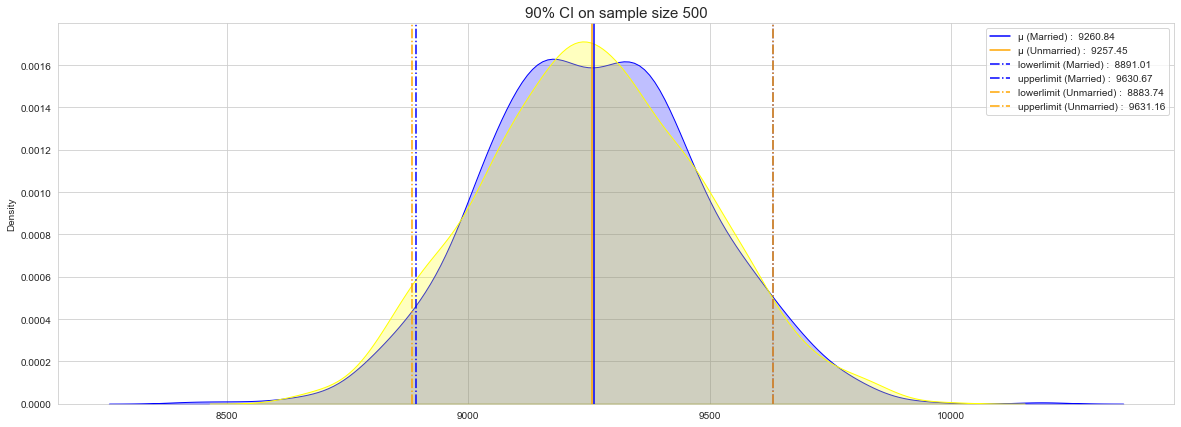

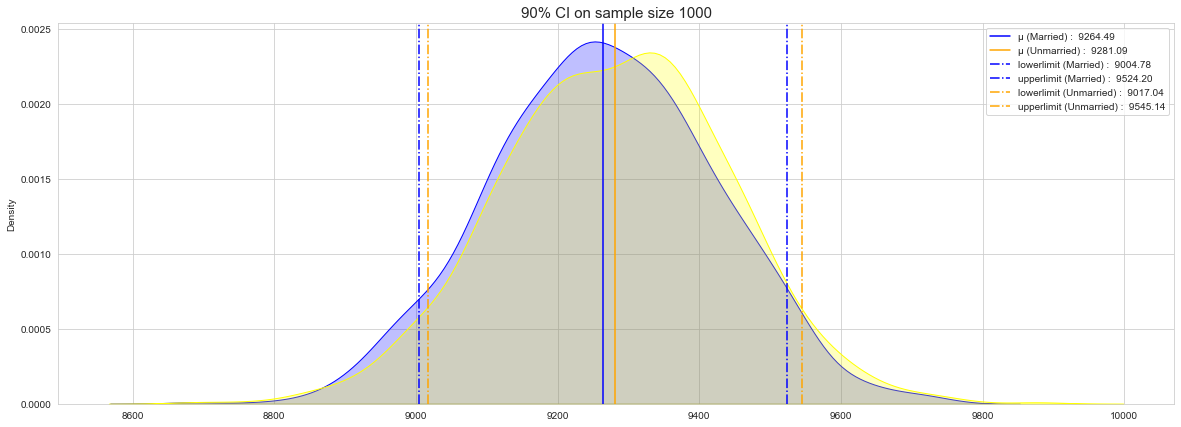

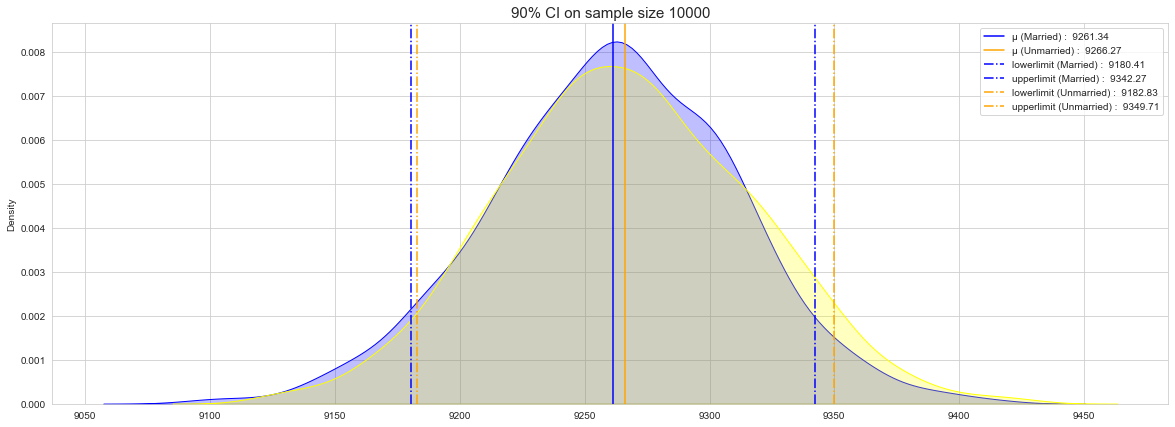

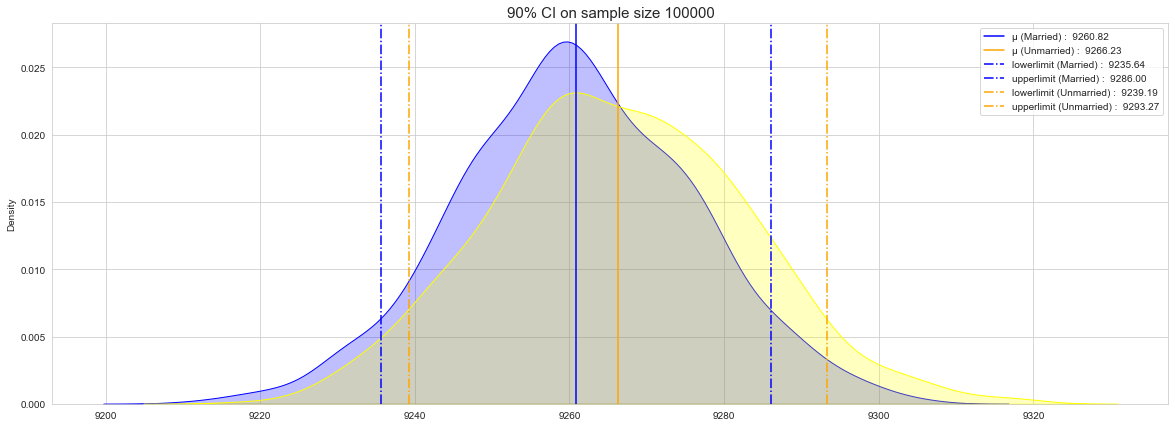

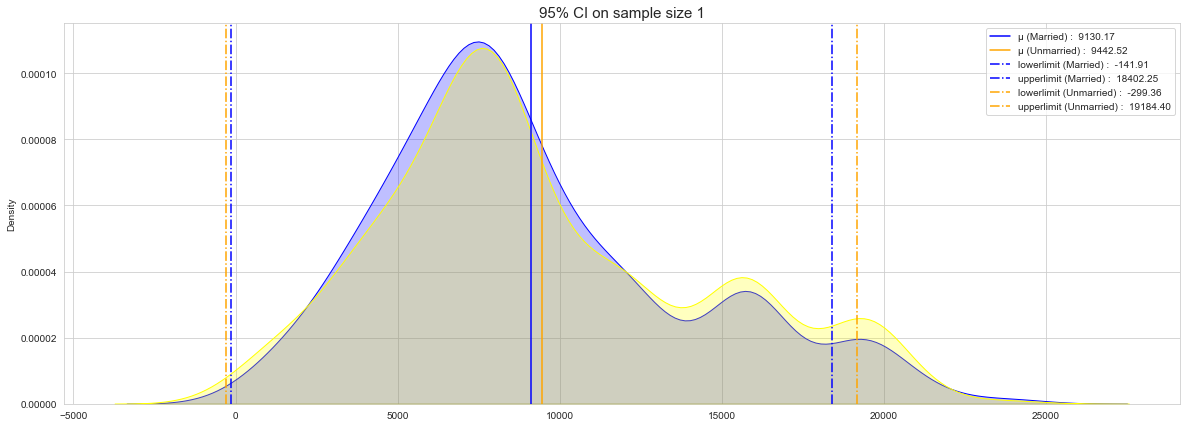

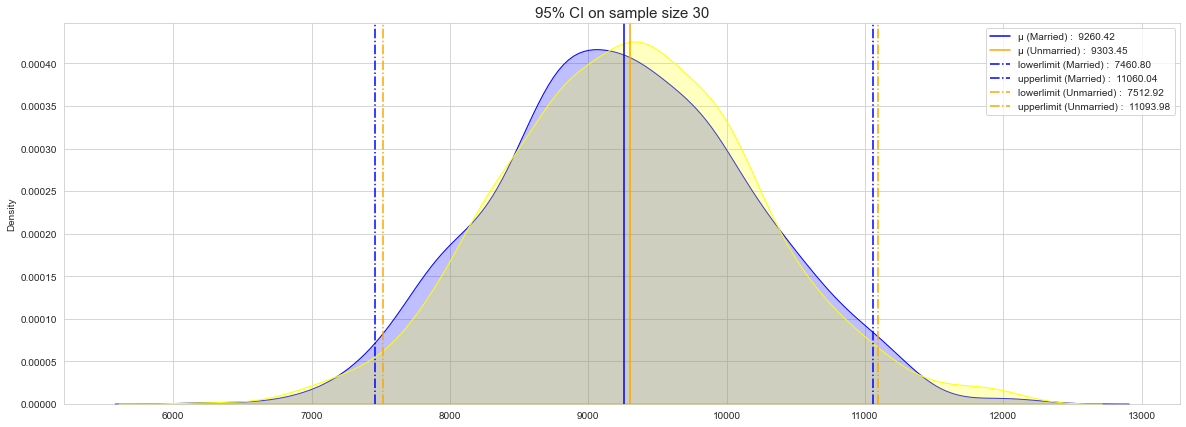

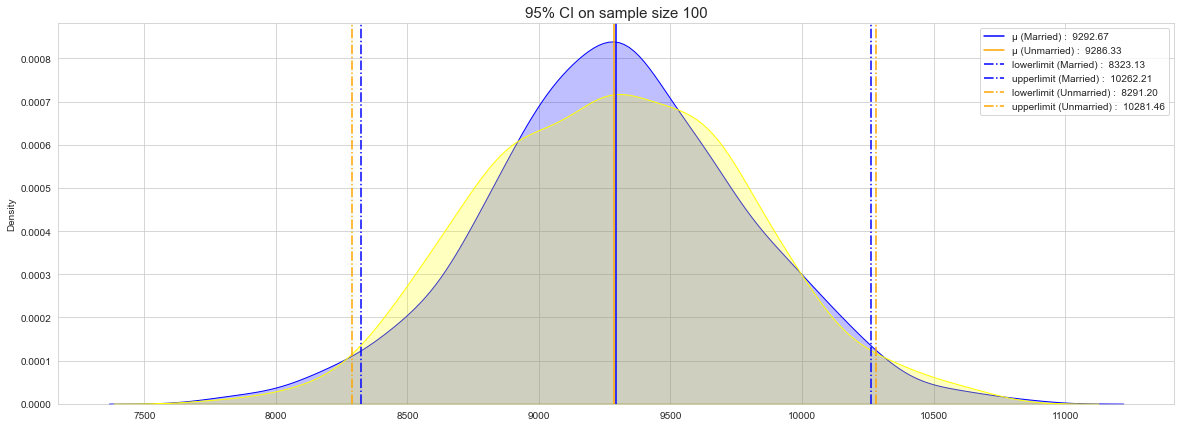

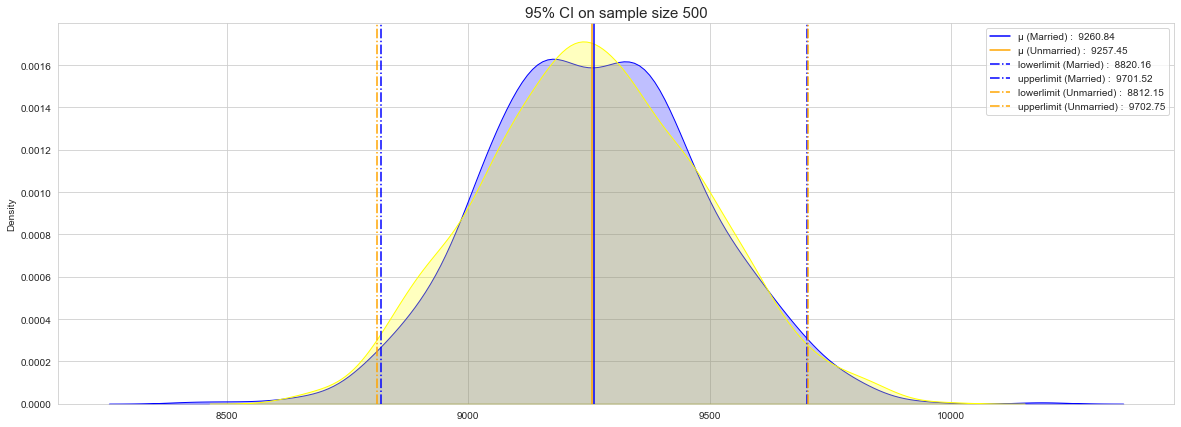

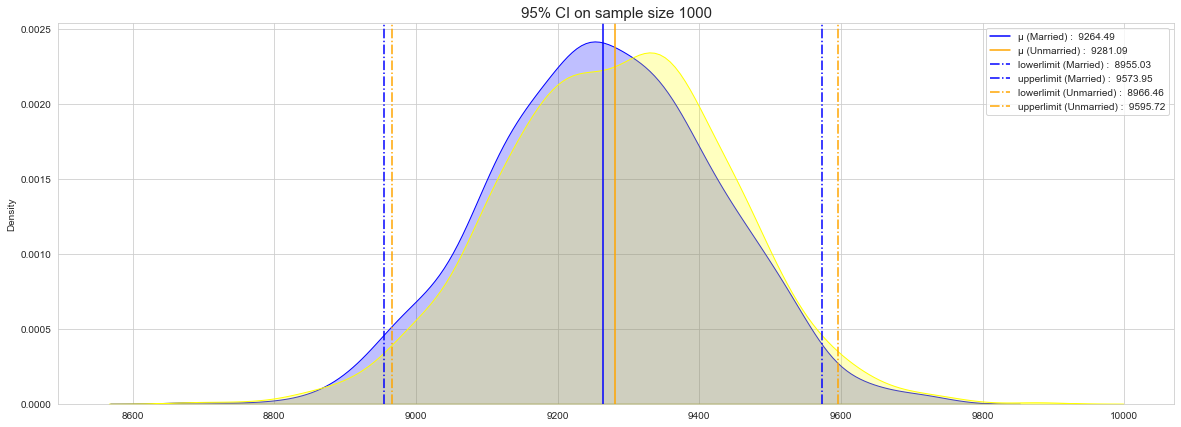

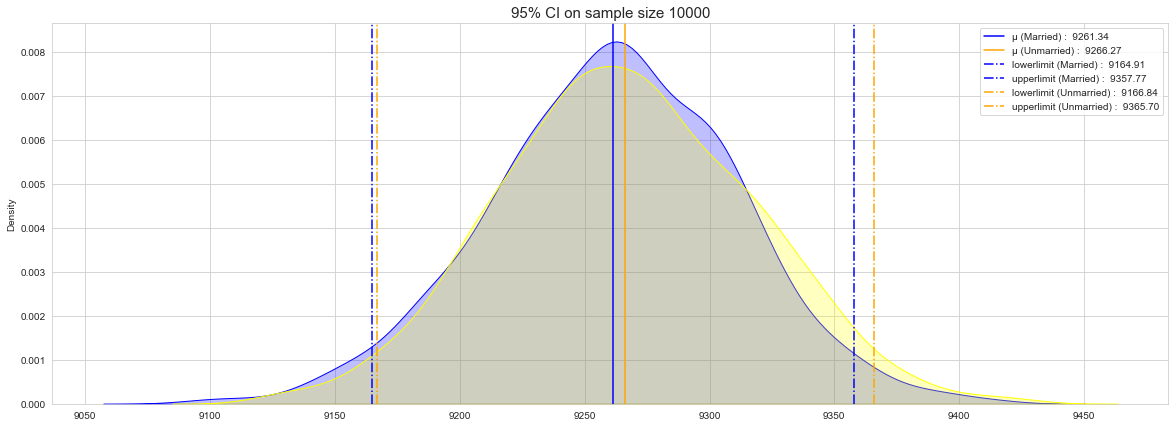

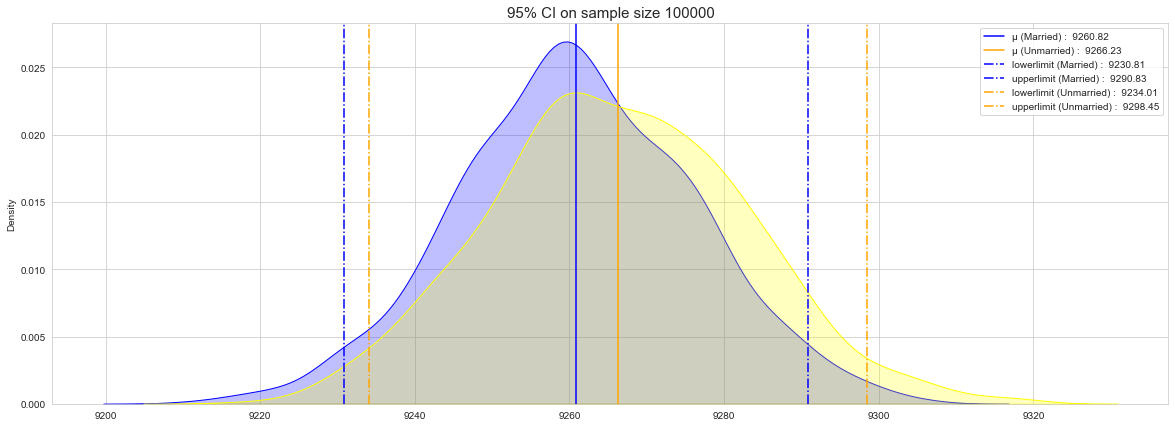

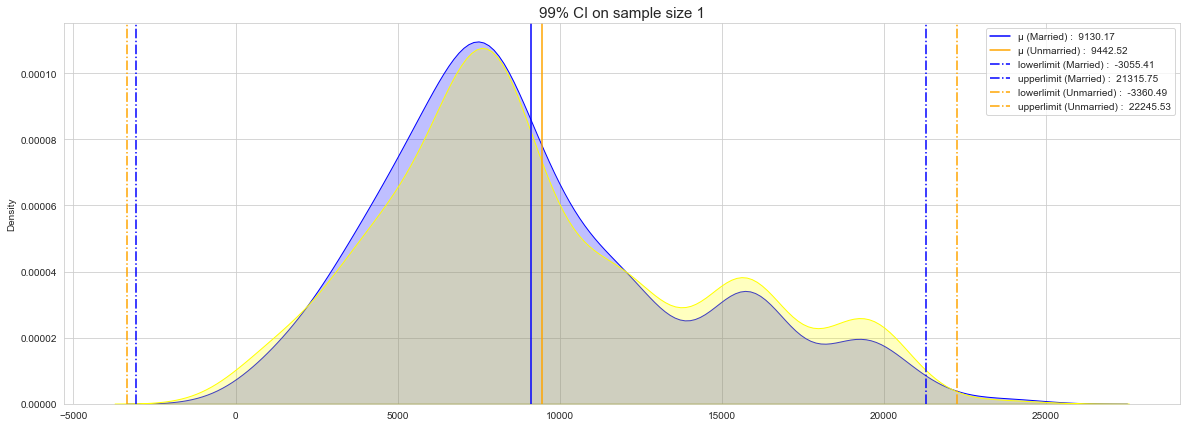

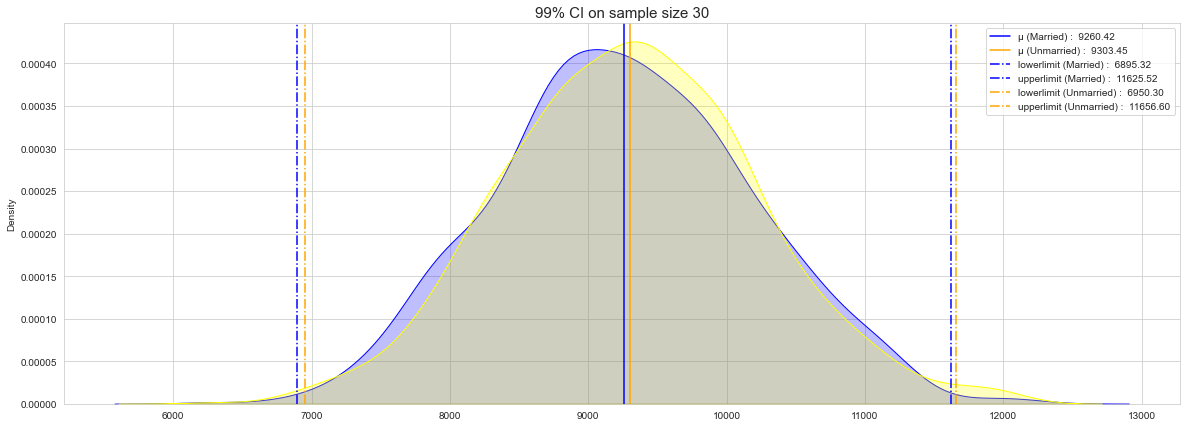

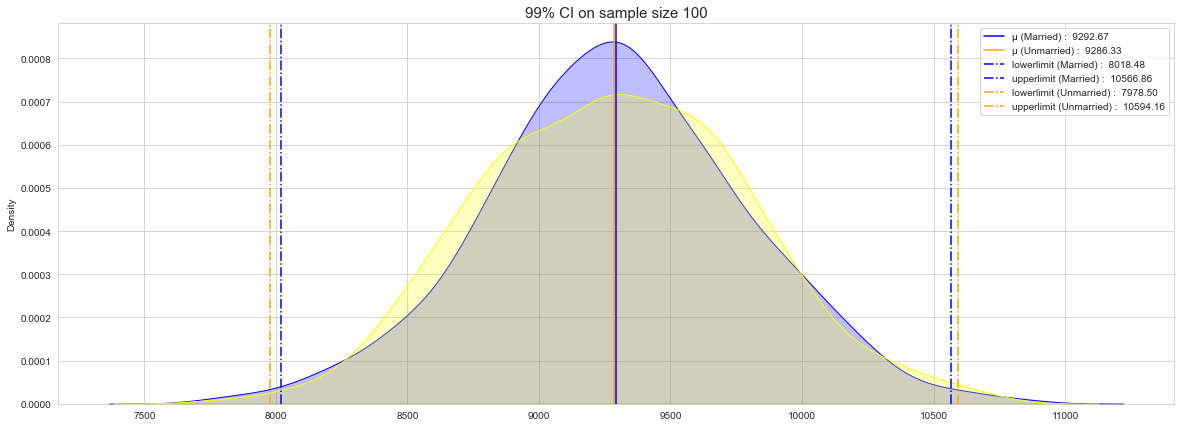

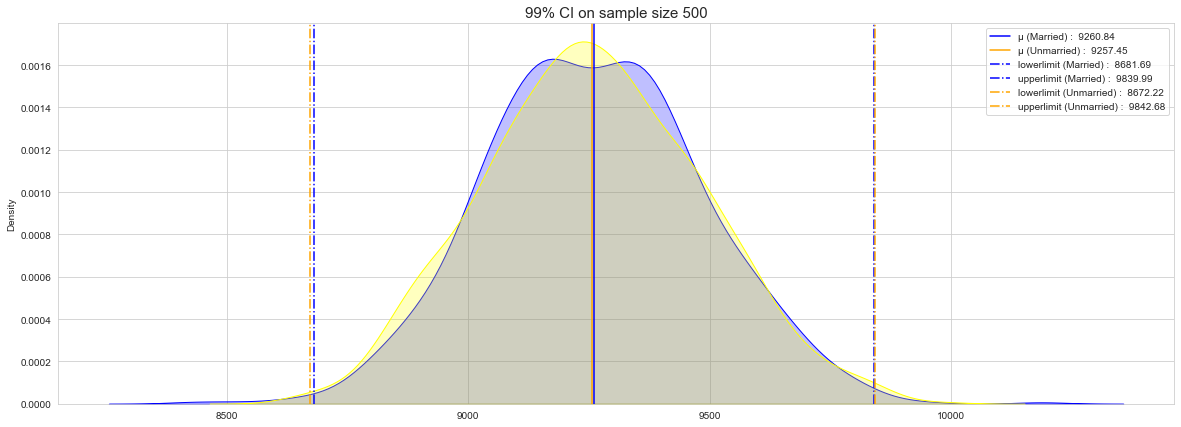

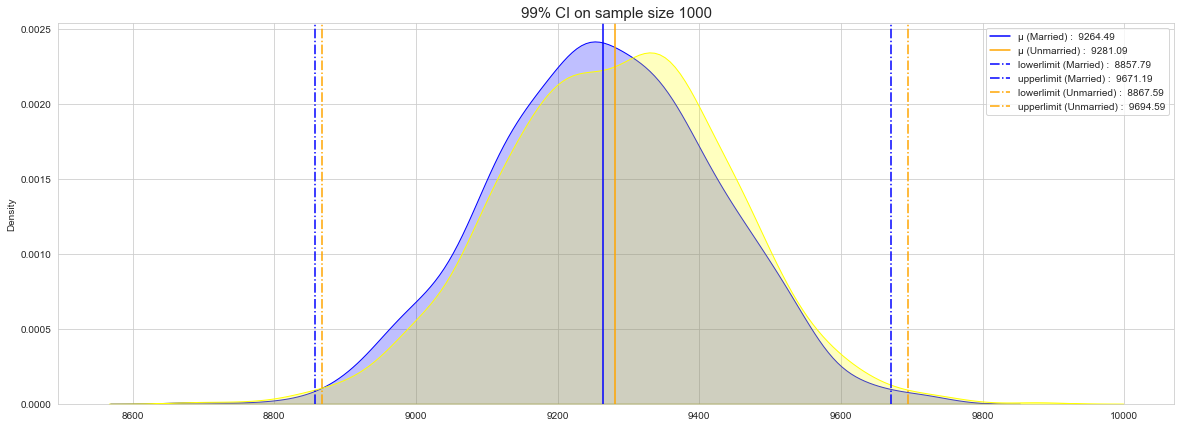

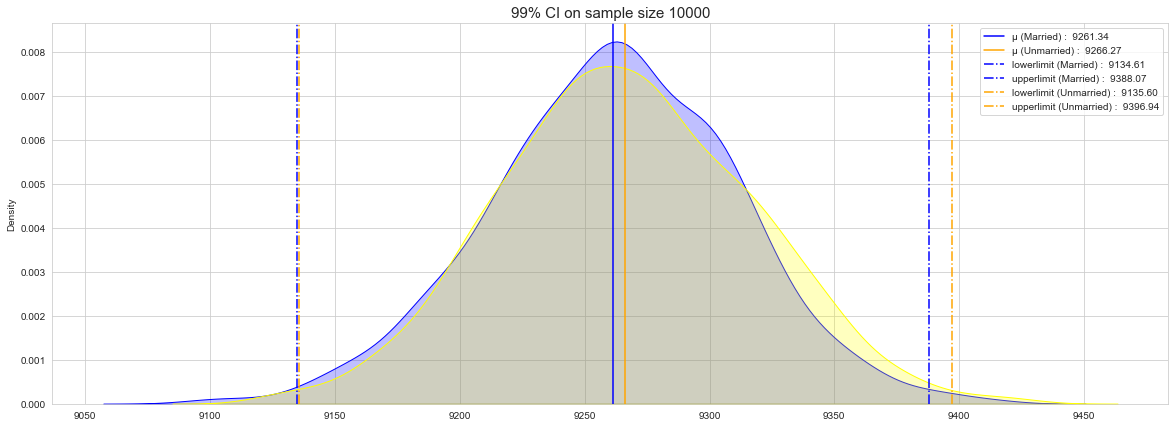

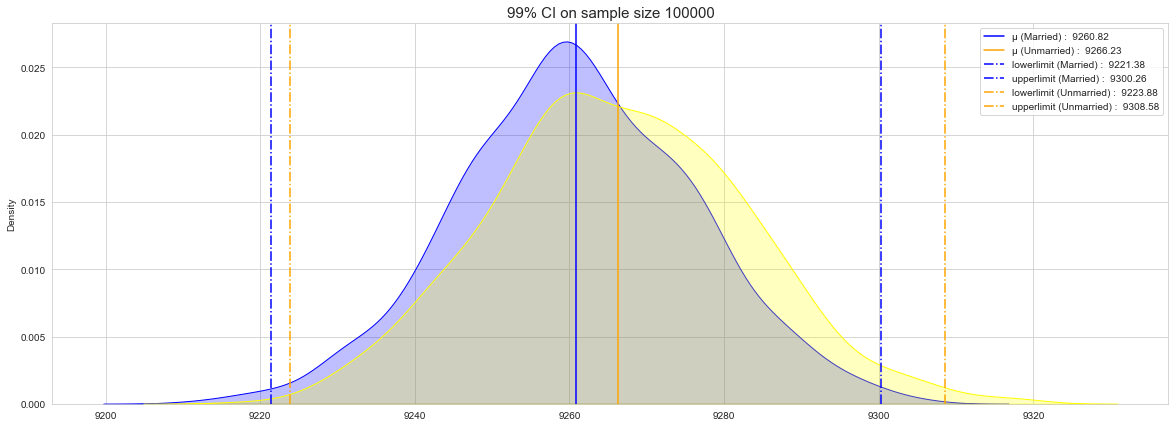

In [55]:
#daframe storing all CI's for married and unmarried with 90,95 and 99 confidence levels for diff sample sizes
overlap_MS = pd.DataFrame({}, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

#loop for kde for diff samples and confidence levels
for c in conf_level:
    
    for size in sample_list:

        ll_mr = ci_Mr['sample_Mr_%s'%size][c]['lower_limit']
        ul_mr = ci_Mr['sample_Mr_%s'%size][c]['upper_limit']
        
        ll_unmr = ci_UnMr['sample_UnMr_%s'%size][c]['lower_limit']
        ul_unmr = ci_UnMr['sample_UnMr_%s'%size][c]['upper_limit']
        
        plt.figure(figsize=(20,7))

        sns.kdeplot(x= avg_samples_Mr['sample_Mr_%s'%size], fill= True, common_grid=False, color= 'blue')
        sns.kdeplot(x= avg_samples_UnMr['sample_UnMr_%s'%size], fill= True, common_grid=False, color= 'yellow')

        plt.axvline(x_bar_Mr['sample_Mr_%s'%size], color = 'blue', 
                    label= "μ (Married) :  {:.2f}".format(x_bar_Mr['sample_Mr_%s'%size]))
        plt.axvline(x_bar_UnMr['sample_UnMr_%s'%size], color = 'orange', 
                    label= "μ (Unmarried) :  {:.2f}".format(x_bar_UnMr['sample_UnMr_%s'%size]))

        plt.axvline(ll_mr, color = 'blue',linestyle='dashdot',
                    label= "lowerlimit (Married) :  {:.2f}".format(ll_mr))
        plt.axvline(ul_mr, color = 'blue',linestyle='dashdot',
                    label= "upperlimit (Married) :  {:.2f}".format(ul_mr))
        
        plt.axvline(ll_unmr, color = 'orange',linestyle='dashdot',
                    label= "lowerlimit (Unmarried) :  {:.2f}".format(ll_unmr))
        plt.axvline(ul_unmr, color = 'orange',linestyle='dashdot',
                    label= "upperlimit (Unmarried) :  {:.2f}".format(ul_unmr))
        
        plt.legend()
        plt.title(f'{c}% CI on sample size {size}', fontsize = 15)
        
        dict_Mr = pd.DataFrame([{'Marital_Status': 1 ,'Lower_limit': ll_mr,'Upper_limit': ul_mr,
                               'Sample_Size': size,'Range': (ul_mr-ll_mr),'Confidence_pct': c}])
        dict_UnMr = pd.DataFrame([{'Marital_Status': 0 ,'Lower_limit': ll_unmr,'Upper_limit': ul_unmr,
                               'Sample_Size': size,'Range': (ul_unmr-ll_unmr),'Confidence_pct': c}]) # 'CI': [ll_m,ul_m],
        dict3 = pd.concat([dict_Mr,dict_UnMr])
        overlap_MS = pd.concat([overlap_MS, dict3])
   




Insights: 
    
    - As the sample size increases the married and unmarried distrubutions has not much differenc and with increasing sample size the standard deviation is decreasing very little whith can be known from the spread of the curve.
    - As sample size increases the spread of the curve decreases very slightly. Overlappingis there between married and unmarried curves is found through all the samples.
    - It is also observed that the CI of married and unmarried are very close but married on the little lower side with all 90,95 and 99% confidence, stating that the purchase of married customers is a little less than unmarried customers.

In [56]:
# Married and Unmarried customers purchase confidence intervals for confidence level 90
overlap_MS[overlap_MS.Confidence_pct==90].reset_index(drop=True)

Marital_Status  Lower_limit  Upper_limit Sample_Size     Range  \
0               1      1348.80     16911.54           1  15562.74   
1               0      1266.87     17618.17           1  16351.30   
2               1      7750.13     10770.71          30   3020.58   
3               0      7800.79     10806.11          30   3005.32   
4               1      8479.01     10106.33         100   1627.32   
5               0      8451.19     10121.47         100   1670.28   
6               1      8891.01      9630.67         500    739.66   
7               0      8883.74      9631.16         500    747.42   
8               1      9004.78      9524.20        1000    519.42   
9               0      9017.04      9545.14        1000    528.10   
10              1      9180.41      9342.27       10000    161.86   
11              0      9182.83      9349.71       10000    166.88   
12              1      9235.64      9286.00      100000     50.36   
13              0      9239.19      9293.27      100000     54.08   

   Confidence_pct  
0              90  
1              90  
2              90  
3              90  
4              90  
5              90  
6              90  
7              90  
8              90  
9              90  
10             90  
11             90  
12             90  
13             90

In [57]:
# Married and unmarried purchase confidence intervals for confidence level 95
overlap_MS[overlap_MS.Confidence_pct==95].reset_index(drop=True)

Marital_Status  Lower_limit  Upper_limit Sample_Size     Range  \
0               1      -141.91     18402.25           1  18544.16   
1               0      -299.36     19184.40           1  19483.76   
2               1      7460.80     11060.04          30   3599.24   
3               0      7512.92     11093.98          30   3581.06   
4               1      8323.13     10262.21         100   1939.08   
5               0      8291.20     10281.46         100   1990.26   
6               1      8820.16      9701.52         500    881.36   
7               0      8812.15      9702.75         500    890.60   
8               1      8955.03      9573.95        1000    618.92   
9               0      8966.46      9595.72        1000    629.26   
10              1      9164.91      9357.77       10000    192.86   
11              0      9166.84      9365.70       10000    198.86   
12              1      9230.81      9290.83      100000     60.02   
13              0      9234.01      9298.45      100000     64.44   

   Confidence_pct  
0              95  
1              95  
2              95  
3              95  
4              95  
5              95  
6              95  
7              95  
8              95  
9              95  
10             95  
11             95  
12             95  
13             95

In [58]:
# Married and unmarried purchase confidence intervals for confidence level 99
overlap_MS[overlap_MS.Confidence_pct==99].reset_index(drop=True)

Marital_Status  Lower_limit  Upper_limit Sample_Size     Range  \
0               1     -3055.41     21315.75           1  24371.16   
1               0     -3360.49     22245.53           1  25606.02   
2               1      6895.32     11625.52          30   4730.20   
3               0      6950.30     11656.60          30   4706.30   
4               1      8018.48     10566.86         100   2548.38   
5               0      7978.50     10594.16         100   2615.66   
6               1      8681.69      9839.99         500   1158.30   
7               0      8672.22      9842.68         500   1170.46   
8               1      8857.79      9671.19        1000    813.40   
9               0      8867.59      9694.59        1000    827.00   
10              1      9134.61      9388.07       10000    253.46   
11              0      9135.60      9396.94       10000    261.34   
12              1      9221.38      9300.26      100000     78.88   
13              0      9223.88      9308.58      100000     84.70   

   Confidence_pct  
0              99  
1              99  
2              99  
3              99  
4              99  
5              99  
6              99  
7              99  
8              99  
9              99  
10             99  
11             99  
12             99  
13             99

Insights: 
    
    - Overlapping of confidence intervals for mean purchase of married and unmarried customers is increasing, 
        which can be known from CI's of 90,95 and 99 confidence levels :
        
        Married:
    - 90% confidence: [9234.33, 9287.29] and diff in CI : 52.96
    - 95% confidence: [9229.25, 9292.37	] and diff in CI : 63.12
    - 99% confidence: [9219.34, 9302.28] and diff in CI : 82.94
    
     Unmarried:
    - 90% confidence: [9239.66, 9290.48] and diff in CI : 50.82
    - 95% confidence: [9234.79, 9295.35] and diff in CI : 60.56
    - 99% confidence: [9225.278, 9304.87] and diff in CI : 79.60
            

# Analysing Purchase w.r.t Age with 90,95 and 99% confidence

In [59]:
age_data = walmart_data.groupby(["Age"])["Purchase"].describe()
age_data

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [60]:
# Calculating mean, std and CI for customers in diff agegroup
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,age= "0-17", no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = np.std(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    #sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"{confidence_level * 100} CI on sample size {smp_siz} on age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return mean,np.round(lower_limit,2),np.round(upper_limit,2)

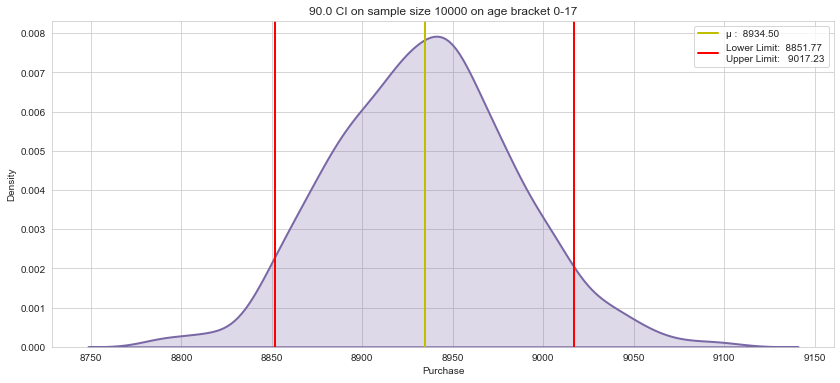

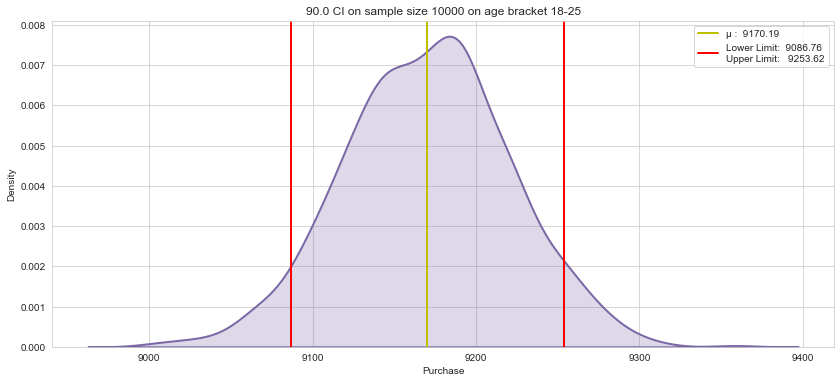

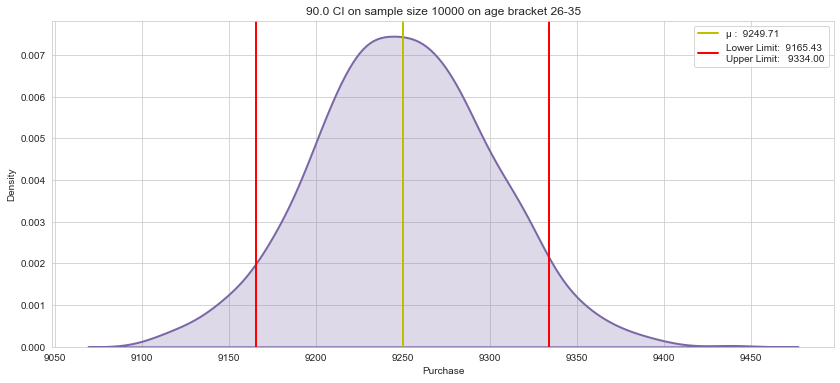

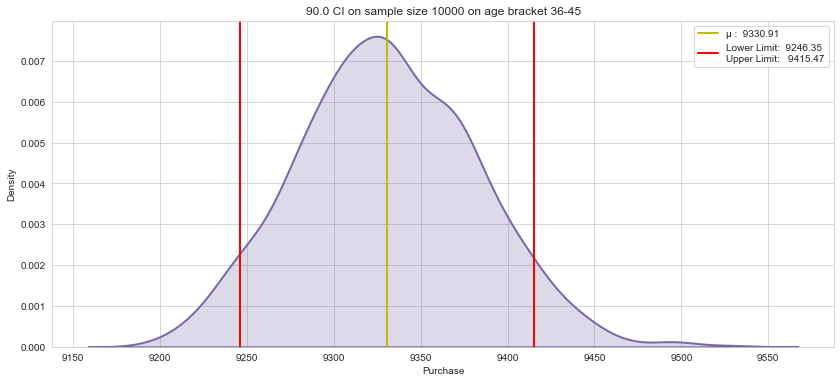

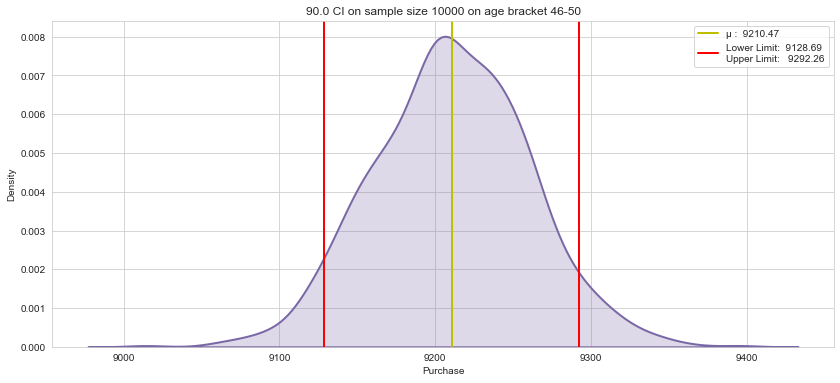

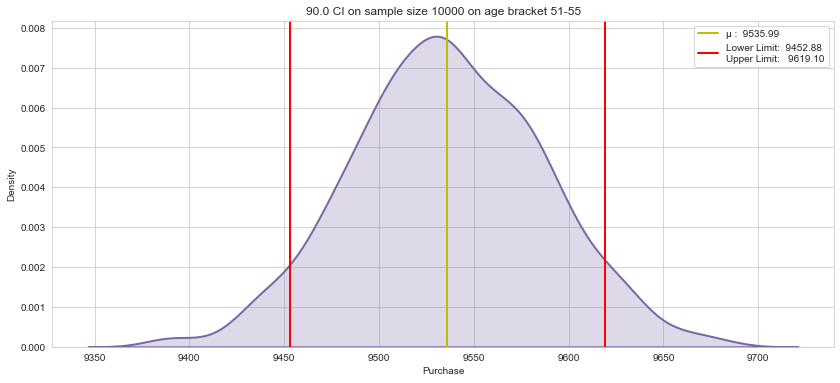

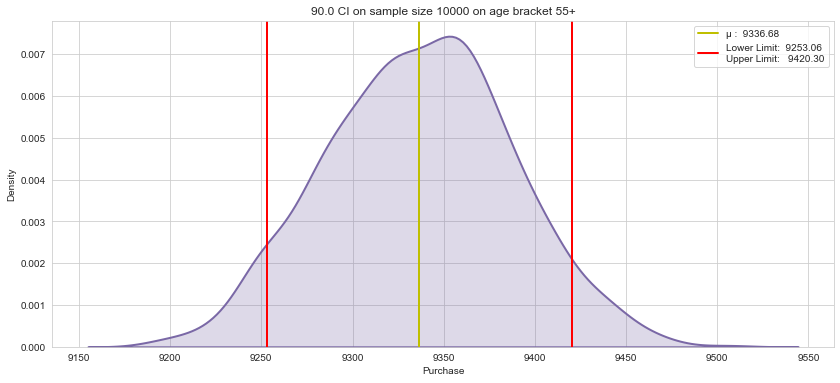

In [61]:
#calculating 90% CI
itr_size = 1000
smp_size = 10000
ci = 0.90
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age, np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),90]]), axis=0)
    
age_data_90 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

In [62]:
age_data_90

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17   8934.5     8851.77     9017.23       10000  165.45999999999913   
1  18-25  9170.19     9086.76     9253.62       10000  166.86000000000058   
2  26-35  9249.71     9165.43      9334.0       10000   168.5699999999997   
3  36-45  9330.91     9246.35     9415.47       10000  169.11999999999898   
4  46-50  9210.47     9128.69     9292.26       10000   163.5699999999997   
5  51-55  9535.99     9452.88      9619.1       10000  166.22000000000116   
6    55+  9336.68     9253.06      9420.3       10000  167.23999999999978   

  Confidence_pct  
0             90  
1             90  
2             90  
3             90  
4             90  
5             90  
6             90

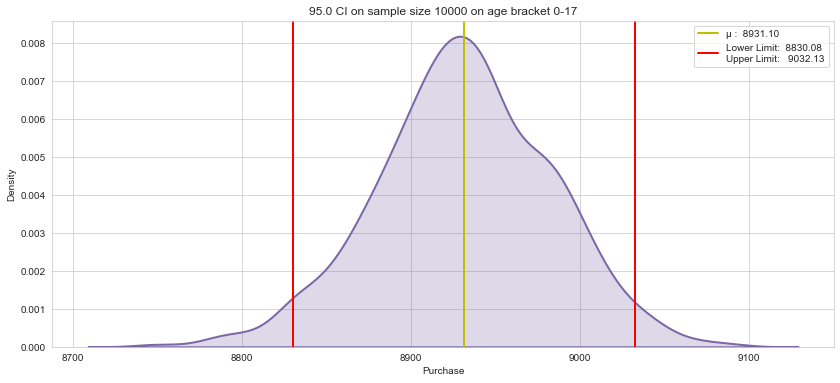

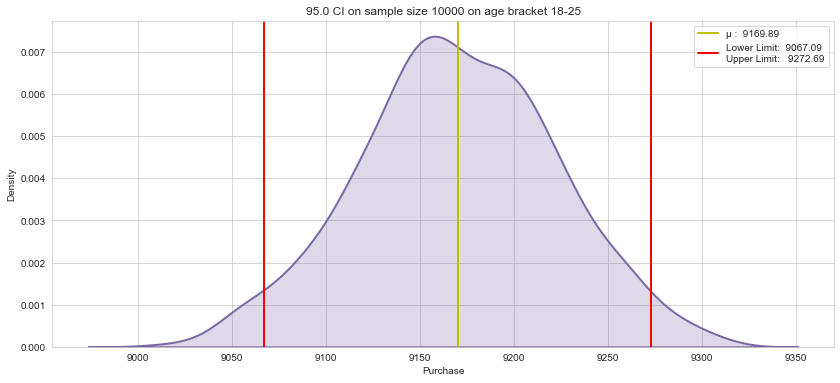

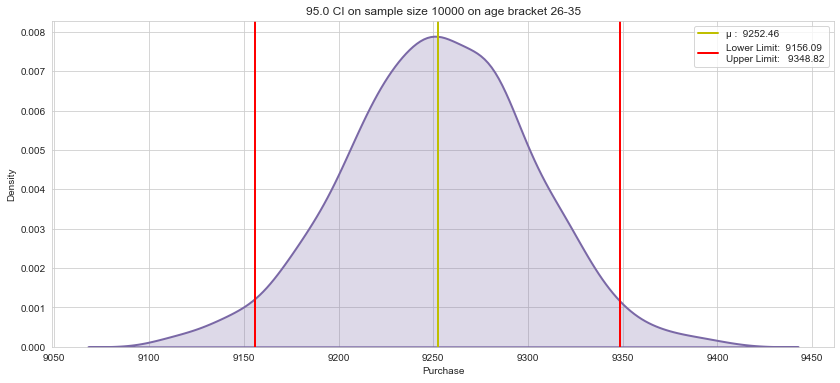

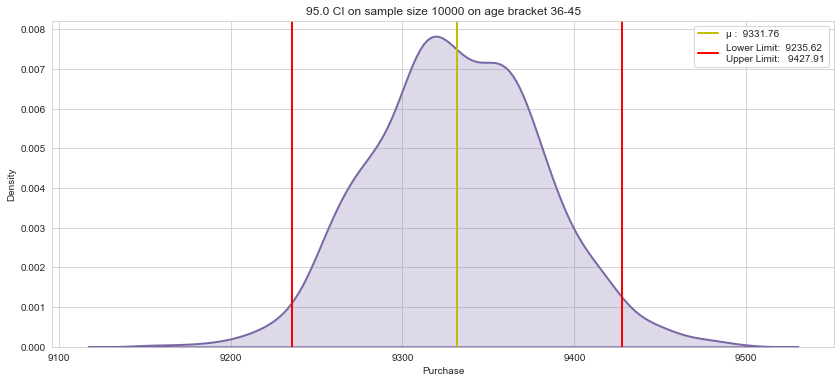

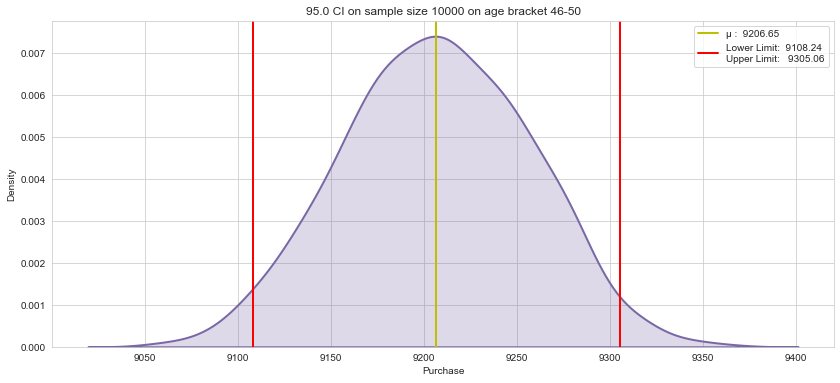

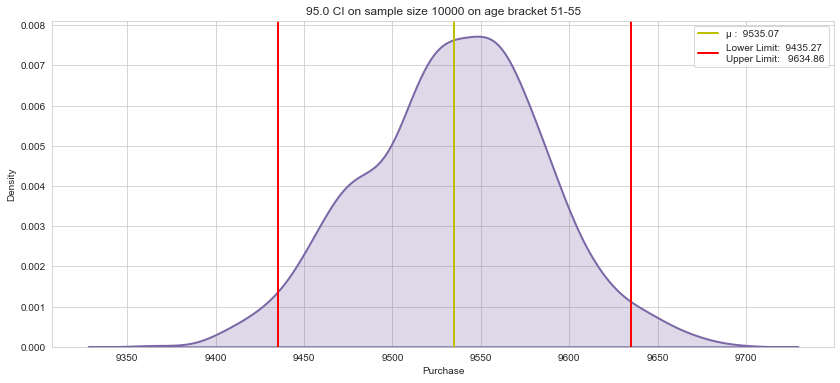

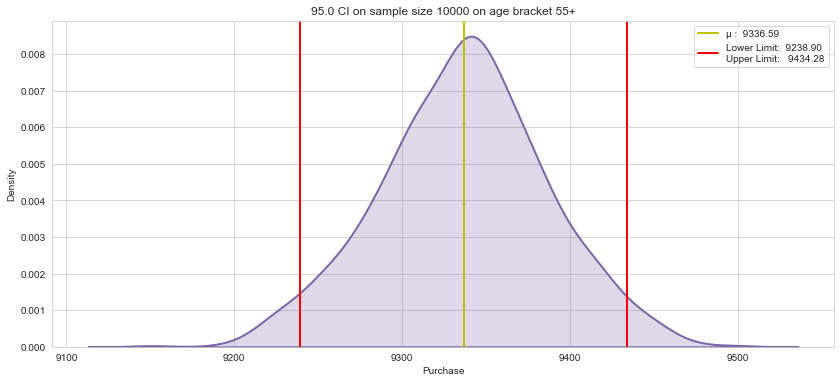

In [63]:
#Calculating 95% CI
itr_size = 1000
smp_size = 10000
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),95]]), axis=0)

age_data_95 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

In [64]:
age_data_95

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17   8931.1     8830.08     9032.13       10000  202.04999999999927   
1  18-25  9169.89     9067.09     9272.69       10000  205.60000000000036   
2  26-35  9252.46     9156.09     9348.82       10000  192.72999999999956   
3  36-45  9331.76     9235.62     9427.91       10000  192.28999999999905   
4  46-50  9206.65     9108.24     9305.06       10000   196.8199999999997   
5  51-55  9535.07     9435.27     9634.86       10000  199.59000000000015   
6    55+  9336.59      9238.9     9434.28       10000  195.38000000000102   

  Confidence_pct  
0             95  
1             95  
2             95  
3             95  
4             95  
5             95  
6             95

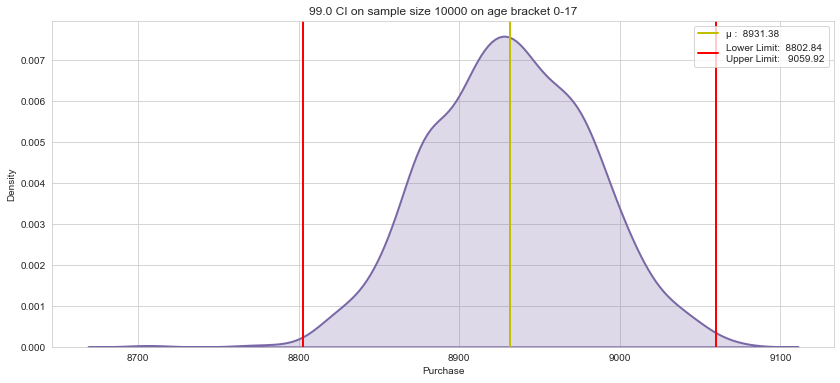

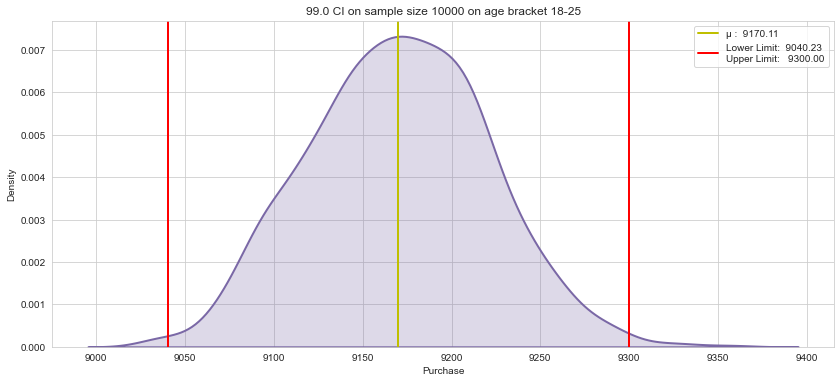

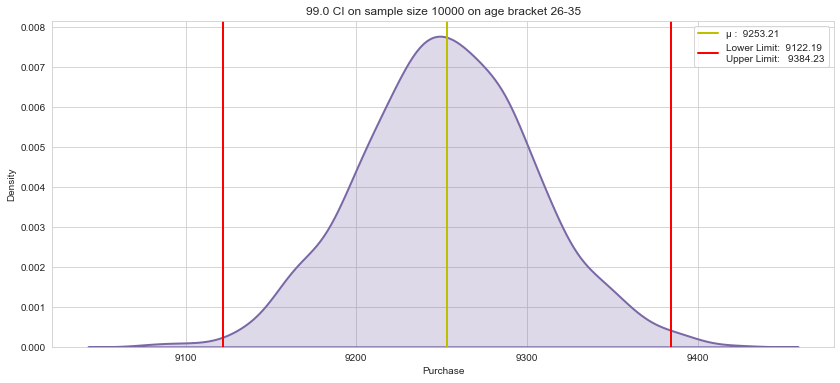

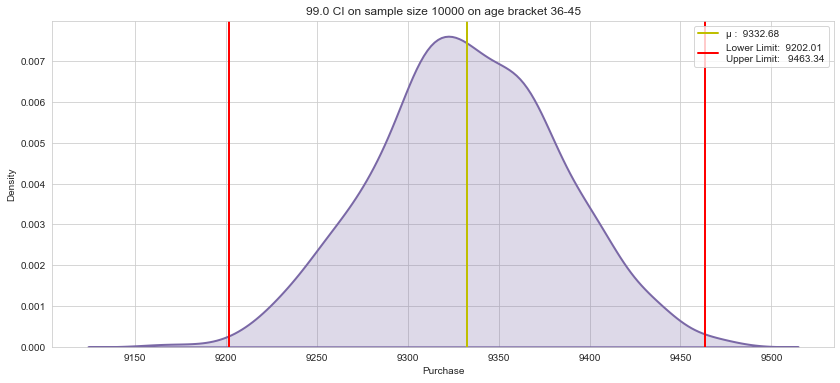

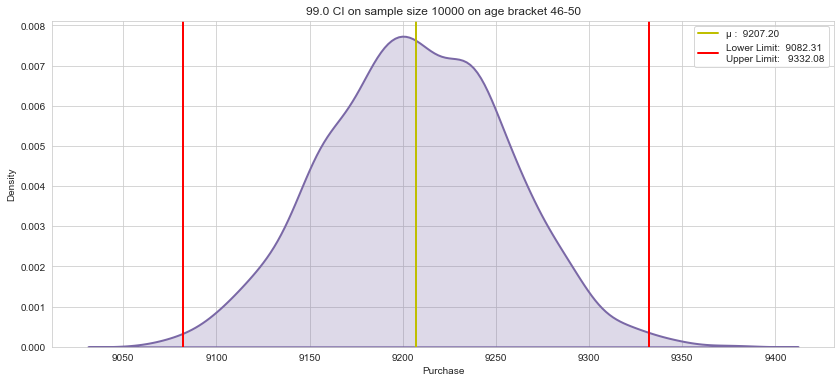

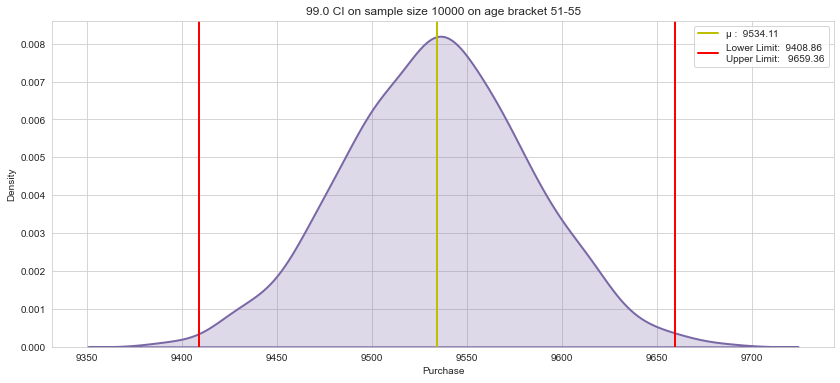

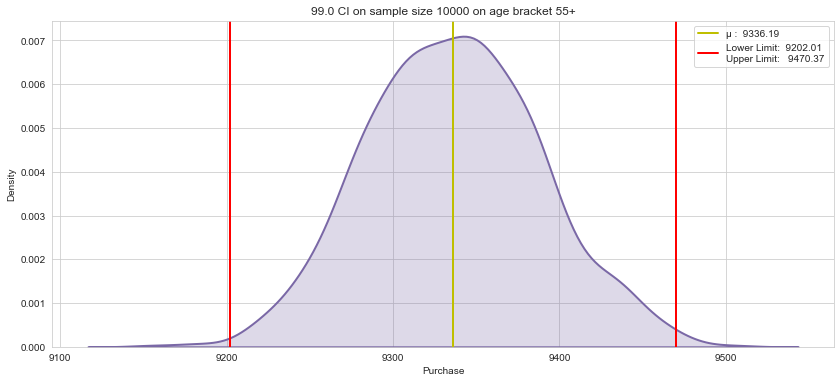

In [65]:
# Calculating 99% CI
itr_size = 1000
smp_size = 10000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),99]]), axis=0)

age_data_99 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])


In [66]:
age_data_99

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17  8931.38     8802.84     9059.92       10000   257.0799999999999   
1  18-25  9170.11     9040.23      9300.0       10000  259.77000000000044   
2  26-35  9253.21     9122.19     9384.23       10000  262.03999999999905   
3  36-45  9332.68     9202.01     9463.34       10000   261.3299999999999   
4  46-50   9207.2     9082.31     9332.08       10000  249.77000000000044   
5  51-55  9534.11     9408.86     9659.36       10000               250.5   
6    55+  9336.19     9202.01     9470.37       10000   268.3600000000006   

  Confidence_pct  
0             99  
1             99  
2             99  
3             99  
4             99  
5             99  
6             99

# Checking the Sampling distribution of a sample mean for each Age Group for 90%, 95% and 99% CI

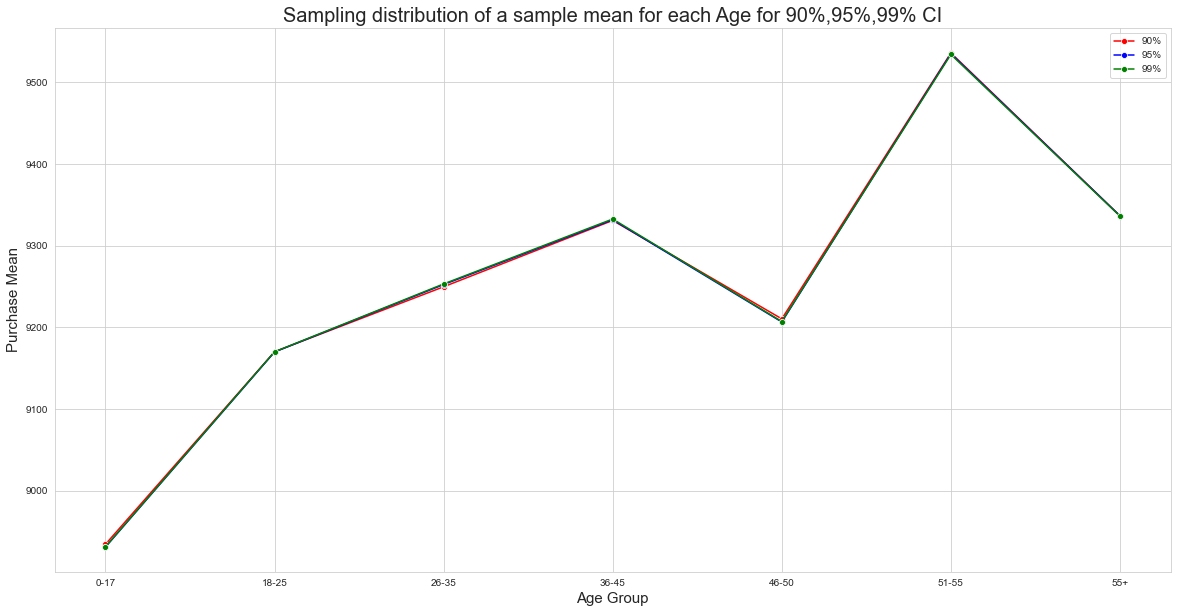

In [67]:
#Checking the Sampling distribution of a sample mean for each Age Group for 90% CI
age_dict_90 = {}
age_dict_95 = {}
age_dict_99 = {}

age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

for i in range(len(age_data_90)):
    age_dict_90[age_list[i]] = float(age_data_90.loc[i, "Mean"])
    
for i in range(len(age_data_95)):
    age_dict_95[age_list[i]] = float(age_data_95.loc[i, "Mean"])
    
for i in range(len(age_data_99)):
    age_dict_99[age_list[i]] = float(age_data_99.loc[i, "Mean"])

plt.figure(figsize=(20,10))
sns.lineplot(data =age_dict_90, x= age_dict_90.keys(), y= age_dict_90.values(), marker= 'o',
             color = 'red', label='90%')
sns.lineplot(data =age_dict_95, x= age_dict_95.keys(), y= age_dict_95.values(), marker= 'o' , 
             color = 'blue', label= '95%')
sns.lineplot(data =age_dict_99, x= age_dict_99.keys(), y= age_dict_99.values(), marker= 'o', 
             color = 'green', label = '99%')

plt.title("Sampling distribution of a sample mean for each Age for 90%,95%,99% CI",fontsize=20)
plt.xlabel('Age Group', fontsize= 15)
plt.ylabel('Purchase Mean', fontsize= 15)
plt.legend(loc='upper right')

plt.show()

Insights: 
    
        From the above data we can say that:
            - The mean of purchases with 90,95 and 99% CI are very close.
            - Customers with age group 51-55 are having the highest mean of CI which says that customers in this
            age group purchase more and next to 51-55 comes 55+ and 36-45 age groups. Where as 0-17 age 
            group purchase less.
            _ Even though there is more scope for 26-35 age group unlike 0-17 the purchase is less.